# **NLP Capstone Project - EHS Chatbot on Accident Level Prediction**

## **Initial Set-ups for Colab**

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Set your project path 
project_path =  "/content/drive/MyDrive/AIML/Capstone Project/"

##**Import necessary libraries for EDA**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import os,re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
import nltk
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS

##**Reading and Exploring the Data**

### **Loading & Reading Data**

In [5]:
df = pd.read_csv(project_path+"IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
df.head()

Unnamed: 0  ...                                        Description
0           0  ...  While removing the drill rod of the Jumbo 08 f...
1           1  ...  During the activation of a sodium sulphide pum...
2           2  ...  In the sub-station MILPO located at level +170...
3           3  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4           4  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 11 columns]

### **Data attributes**

In [6]:
df.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [7]:
df.shape

(425, 11)



> **There are 11 columns that includes unnamed**

> **There are 425 datasets**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB




> **All attributes are Object type. Unnamed have no relevancy and can be dropped**



### **Drop 'Unnamed' first column**

In [9]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.shape

(425, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


### **Rename & Correct the column names for ease of referrence**

In [11]:
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Local':'Locality', 'Industry Sector':'Sector', 'Genre':'Gender', 'Employee or Third Party':'Employee type', 'Critical Risk':'Risk Type'}, inplace=True)
df.head()

Date  ...                                        Description
0  01-01-16 00:00  ...  While removing the drill rod of the Jumbo 08 f...
1  02-01-16 00:00  ...  During the activation of a sodium sulphide pum...
2  06-01-16 00:00  ...  In the sub-station MILPO located at level +170...
3  08-01-16 00:00  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4  10-01-16 00:00  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 10 columns]

In [12]:
df.rename(columns={'Accident Level':'Acc_level','Potential Accident Level':'Pot_Acc_Level','Employee type':'Emp_type', 'Risk Type':'Risk_Type'}, inplace=True)
df.head()

Date  ...                                        Description
0  01-01-16 00:00  ...  While removing the drill rod of the Jumbo 08 f...
1  02-01-16 00:00  ...  During the activation of a sodium sulphide pum...
2  06-01-16 00:00  ...  In the sub-station MILPO located at level +170...
3  08-01-16 00:00  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4  10-01-16 00:00  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 10 columns]

### **Check for missing values**

In [13]:
# Checking Null colunms
df_null = df.isnull().sum()
df_null

Date             0
Country          0
Locality         0
Sector           0
Acc_level        0
Pot_Acc_Level    0
Gender           0
Emp_type         0
Risk_Type        0
Description      0
dtype: int64

> **There is no missing data in given dataset. Hence no need to process missing values**

### **Unique Values in each attributes**

In [14]:
df.nunique()

Date             287
Country            3
Locality          12
Sector             3
Acc_level          5
Pot_Acc_Level      6
Gender             2
Emp_type           3
Risk_Type         33
Description      411
dtype: int64

In [15]:
for column in df.columns[1:9]:
    print(column, " : ", len(df[column].unique()), "Unique Values")
    print(df[column].unique())
    print('-------------')

Country  :  3 Unique Values
['Country_01' 'Country_02' 'Country_03']
-------------
Locality  :  12 Unique Values
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
-------------
Sector  :  3 Unique Values
['Mining' 'Metals' 'Others']
-------------
Acc_level  :  5 Unique Values
['I' 'IV' 'III' 'II' 'V']
-------------
Pot_Acc_Level  :  6 Unique Values
['IV' 'III' 'I' 'II' 'V' 'VI']
-------------
Gender  :  2 Unique Values
['Male' 'Female']
-------------
Emp_type  :  3 Unique Values
['Third Party' 'Employee' 'Third Party (Remote)']
-------------
Risk_Type  :  33 Unique Values
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 

### **Process the Date column and add columns for the day, weekday, month, quarter to evaluate any accident levels relations with periods across every year**

In [16]:
df['Date'] = pd.to_datetime(df['Date']) #To consider the column as Date time series
df['Year'] = df['Date'].apply(lambda x : x.year) #Extract the year of that incident as separate column
df['Month'] = df['Date'].apply(lambda x : x.month) #Extract the month of that incident as separate column
df['Day'] = df['Date'].apply(lambda x : x.day) #Extract the day the incident occured in the month as separate column
df['Weekday'] = df['Date'].apply(lambda x : x.day_name()) #Extract the Weekday of the incident date as separate column
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear) #Extract the week of the incident in the year as separate column

In [17]:
df.head()

Date     Country  Locality  Sector  ... Month Day    Weekday WeekofYear
0 2016-01-01  Country_01  Local_01  Mining  ...     1   1     Friday         53
1 2016-02-01  Country_02  Local_02  Mining  ...     2   1     Monday          5
2 2016-06-01  Country_01  Local_03  Mining  ...     6   1  Wednesday         22
3 2016-08-01  Country_01  Local_04  Mining  ...     8   1     Monday         31
4 2016-10-01  Country_01  Local_04  Mining  ...    10   1   Saturday         39

[5 rows x 15 columns]

**In general the Season or Weather also a major contributor for any incidents, like Winter invite cold related issues, Summer invite hot stroke related health and safety concers, Monsoon invite slippery kind of safety issues, etc**

**Let's develop the column that identify season when incident occured**

**The data is collected from Brazil which is located in the Southern Hemisphere, its seasons are the exact opposite of what Northern Hemisphere residents.**
> **Summer** is December through Febraury

> **Autumn** is March through May

> **Winter** is June through August

> **Spring** is Septemner through November

>  Within the country the climate varies considerably from region to region.

**Create the season column based on the month column that was extracted from the date of incident**

In [18]:
#Define the function to create seasons from month
def m2s(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [19]:
#Creast the column Season passing the 'Month' data in above defined m2s function.
df['Season'] = df['Month'].apply(m2s)
df.head()

Date     Country  Locality  Sector  ... Day    Weekday WeekofYear  Season
0 2016-01-01  Country_01  Local_01  Mining  ...   1     Friday         53  Summer
1 2016-02-01  Country_02  Local_02  Mining  ...   1     Monday          5  Summer
2 2016-06-01  Country_01  Local_03  Mining  ...   1  Wednesday         22  Winter
3 2016-08-01  Country_01  Local_04  Mining  ...   1     Monday         31  Winter
4 2016-10-01  Country_01  Local_04  Mining  ...   1   Saturday         39  Spring

[5 rows x 16 columns]

**Let's consider Quarter of the calender also plays the role in incidents**

In [20]:
#Define the function to create Quarter of the year from month
def m2q(x):
    if x in [1, 2, 3]:
        quarter = 'Q1'
    elif x in [4,5,6]:
        quarter = 'Q2'
    elif x in [7,8,9]:
        quarter = 'Q3'
    elif x in [10,11,12]:
        quarter = 'Q4'
    return quarter

In [21]:
#Creast the column Quarter passing the 'Month' data in above defined m2q function.
df['Quarter'] = df['Month'].apply(m2q)
df.head()

Date     Country  Locality  ... WeekofYear  Season Quarter
0 2016-01-01  Country_01  Local_01  ...         53  Summer      Q1
1 2016-02-01  Country_02  Local_02  ...          5  Summer      Q1
2 2016-06-01  Country_01  Local_03  ...         22  Winter      Q2
3 2016-08-01  Country_01  Local_04  ...         31  Winter      Q3
4 2016-10-01  Country_01  Local_04  ...         39  Spring      Q4

[5 rows x 17 columns]

## **EDA**

### **Univariate Analysis**

In [22]:
# function for distribution, frequency plot
def UniPlot(aCol):
    aBar = df[aCol]
    aSeries = df.groupby(aCol)['Acc_level'].count()
    aLabel = aSeries.keys()  #df_accidents[aCol]
    aUnique = df[aCol].nunique()
    
    plt.figure(figsize= (24,14))
    
    # bar char showing count
    plt.subplot(1, 2, 1)
    plt.title(aCol + ' Count', {'fontsize': 16, 'fontweight' : 'bold',  'color' : 'purple'})
    plt.xlabel(aCol, {'fontsize': 16, 'fontweight' : 'bold',  'color' : 'blue'})
    plt.ylabel('Total number of Accidents', {'fontsize': 16, 'fontweight' : 'bold',  'color' : 'green'})
    ax = sns.countplot(aBar, data=df)    
    plt.tick_params(labelsize=13)
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    # pie chart showing percentage
    plt.subplot(1, 2, 2)
    plt.title(aCol + ' Percentage', {'fontsize': 16, 'fontweight' : 'bold',  'color' : 'purple'})
    plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.8, shadow=True, startangle=90, counterclock=False, textprops={'fontsize': 14, 'fontweight' : 'bold',  'color' : 'white'},labeldistance=0.5)
    # plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.5, shadow=True, rotatelabels =False, startangle=180, counterclock=True)
    plt.axis('equal')
    

    plt.show()

ANALYSIS BY Country:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


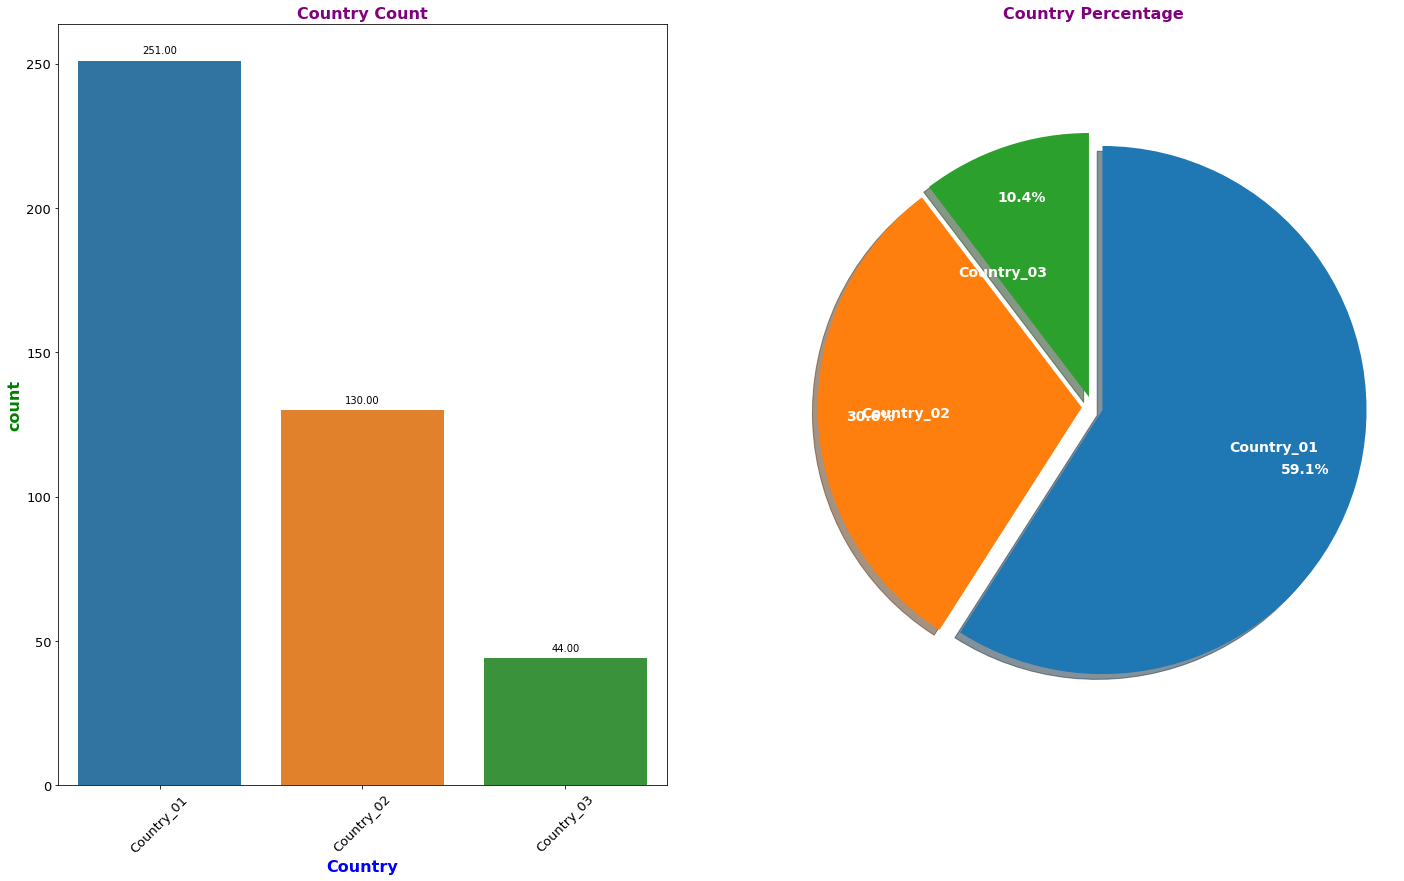

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Locality:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


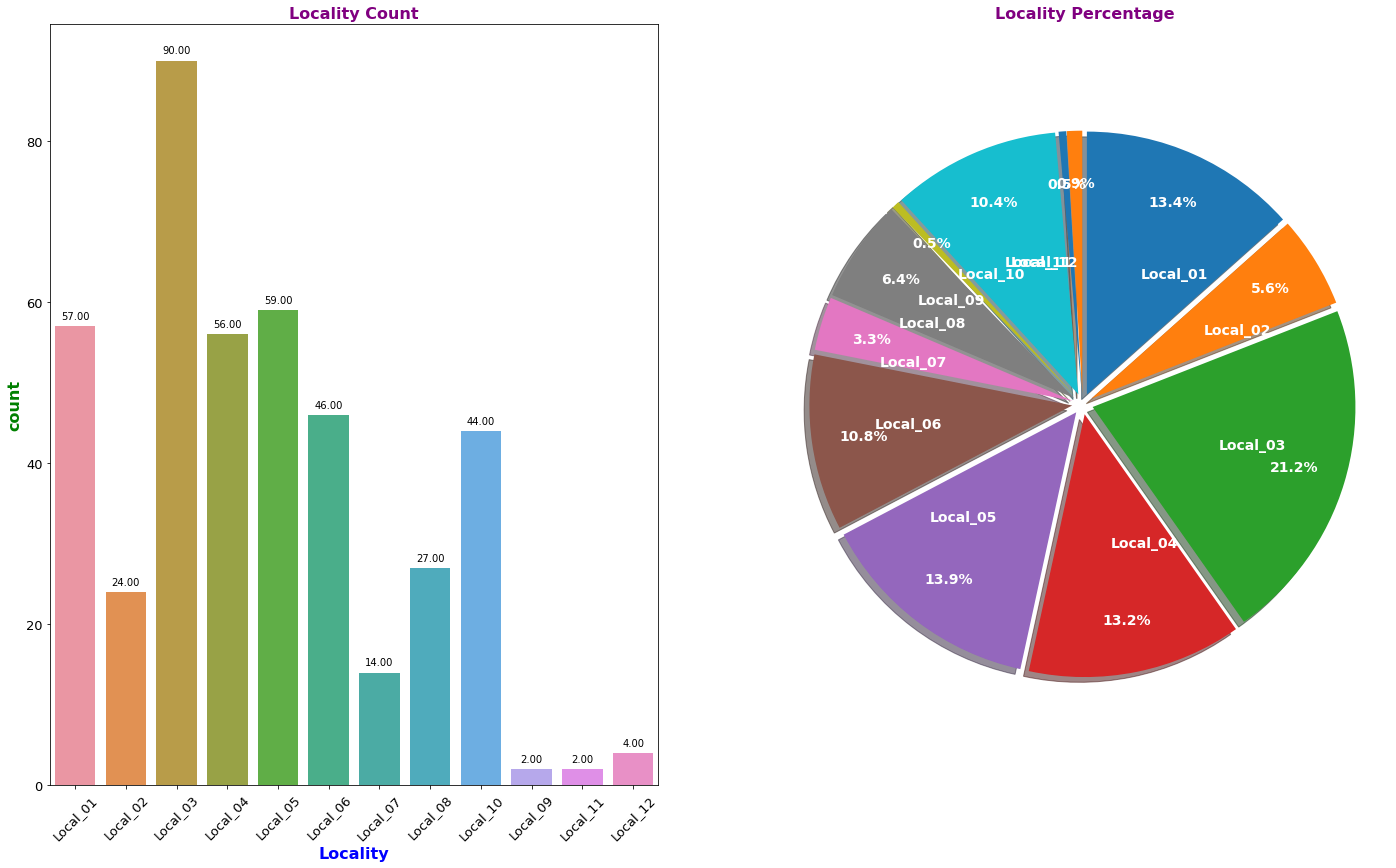

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Sector:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


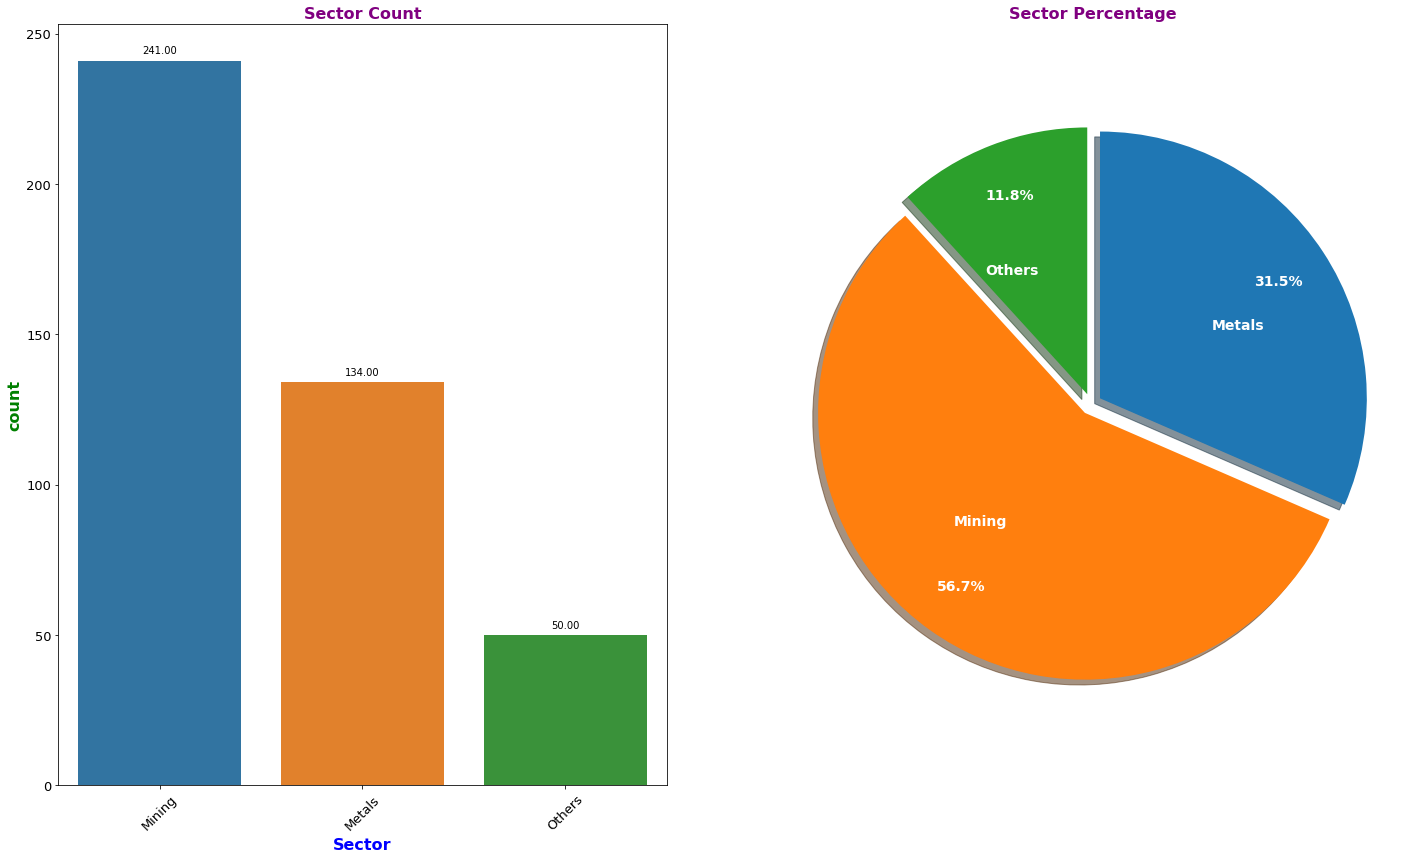

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Acc_level:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


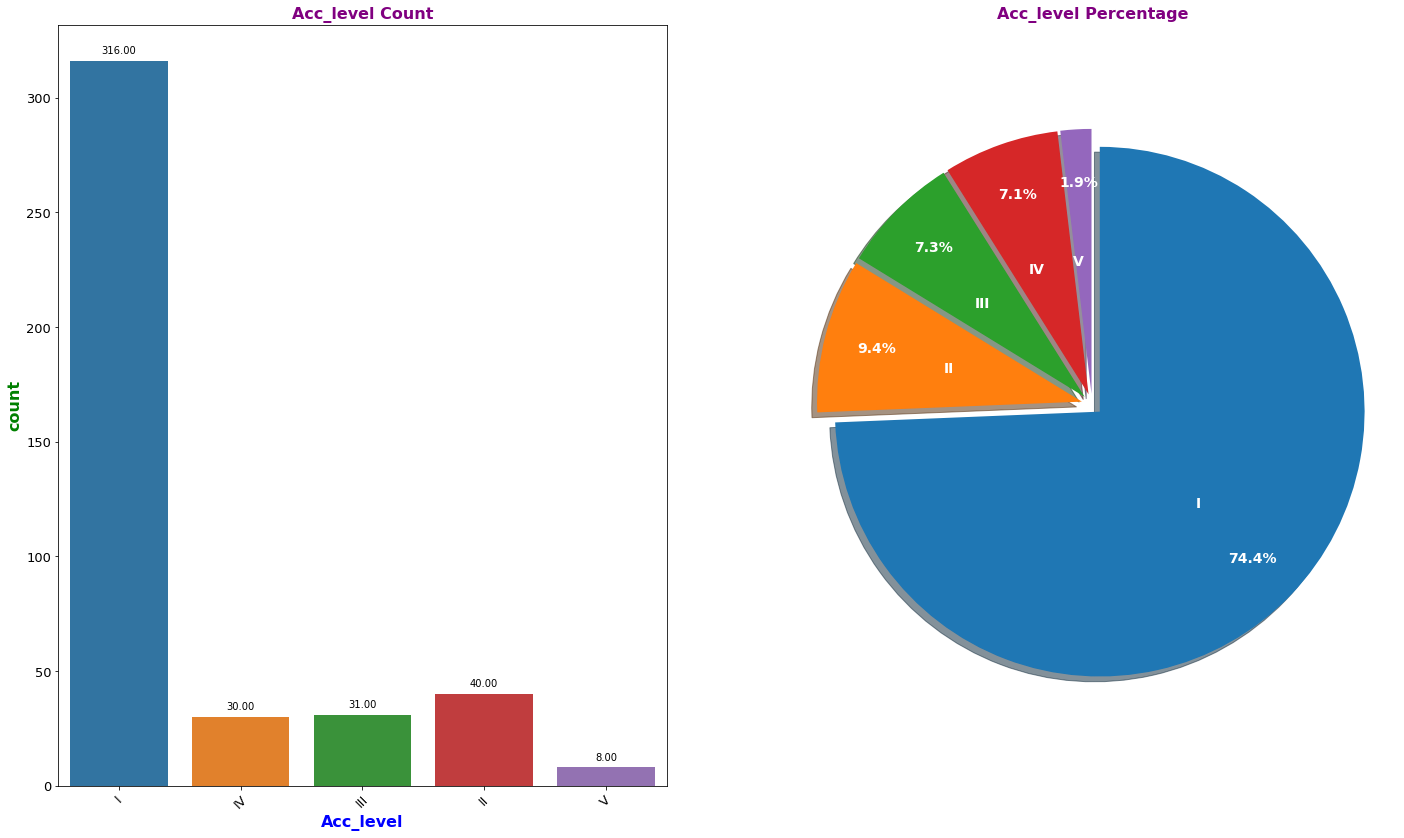

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Pot_Acc_Level:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


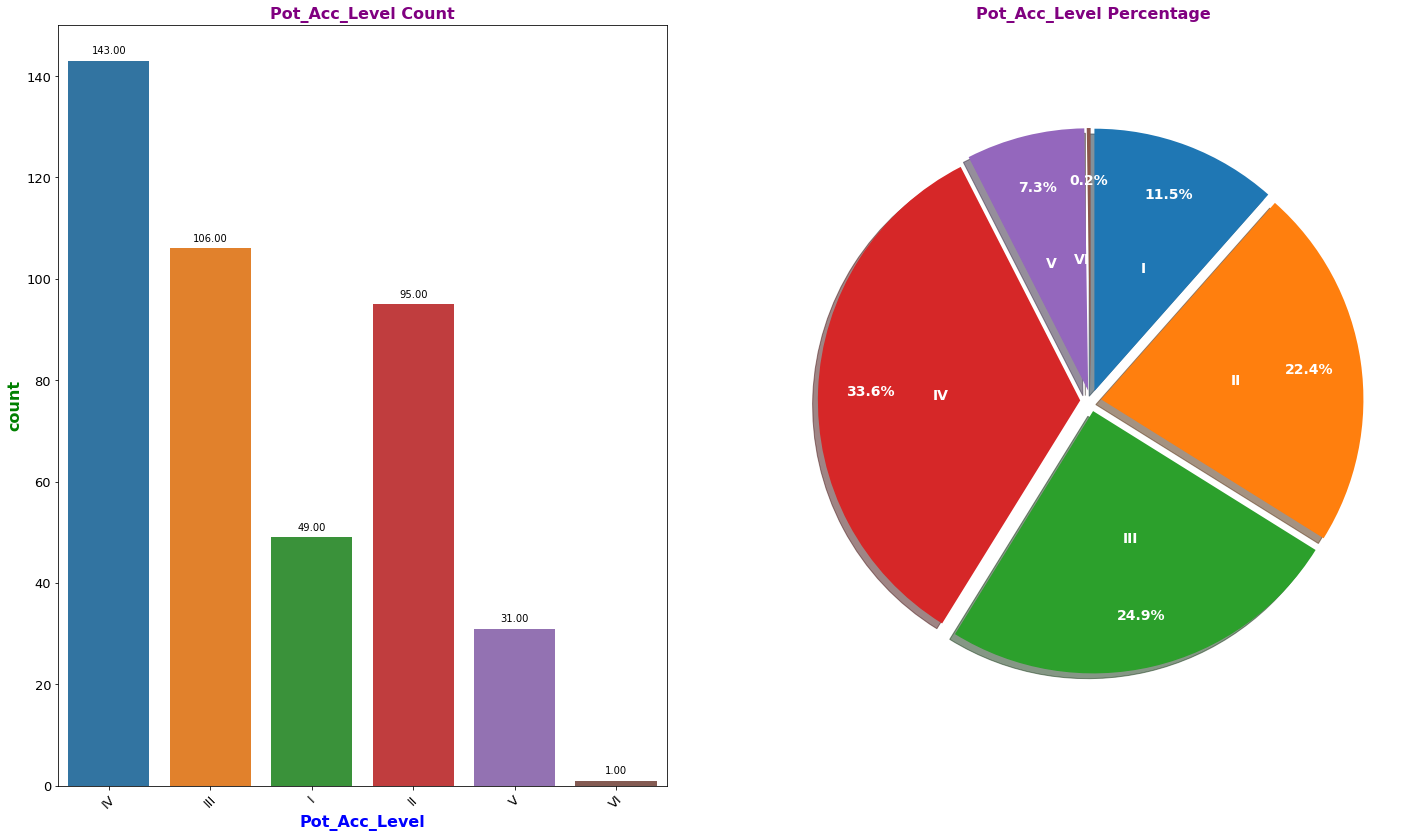

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Gender:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


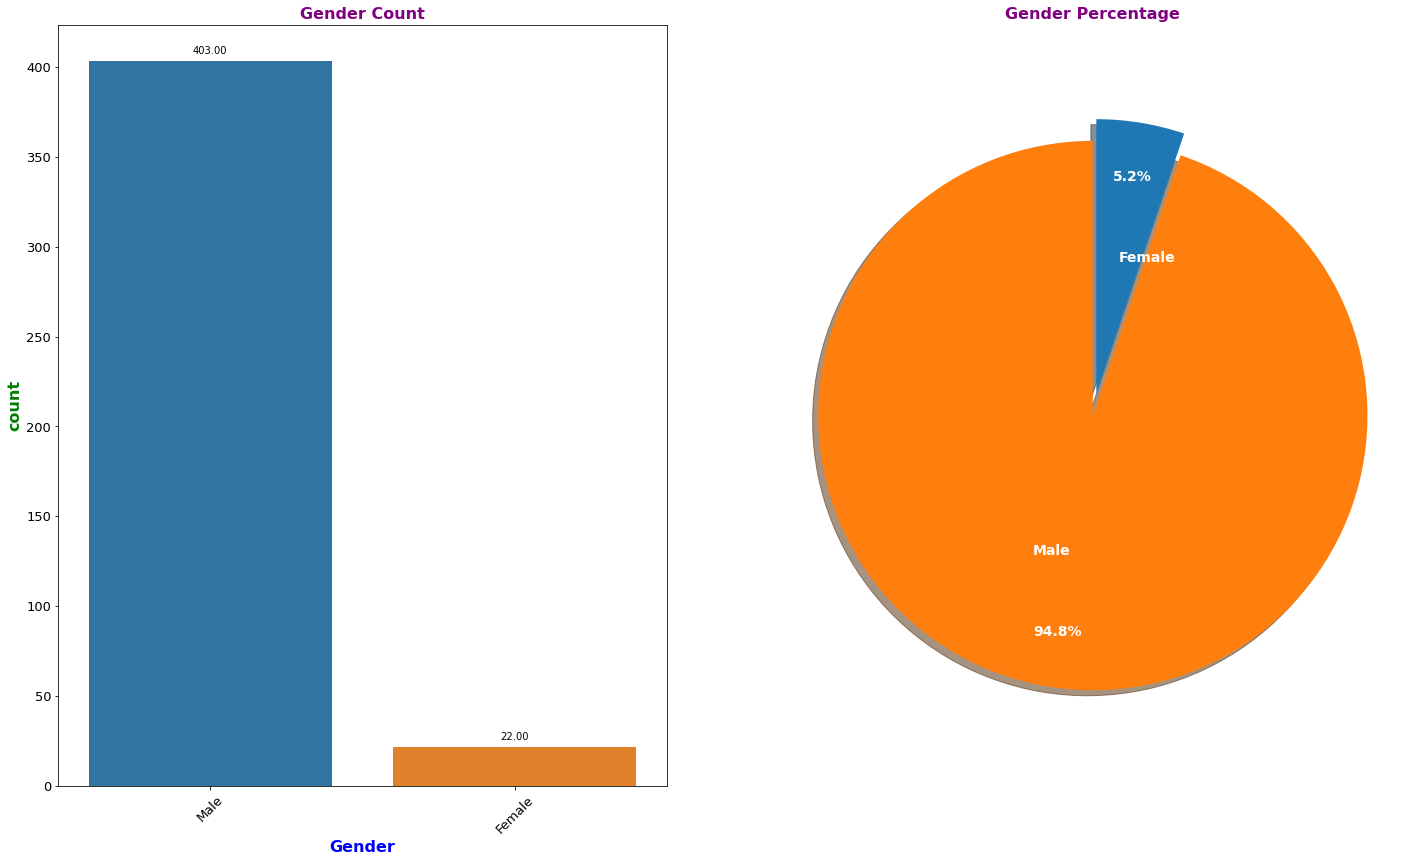

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Emp_type:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


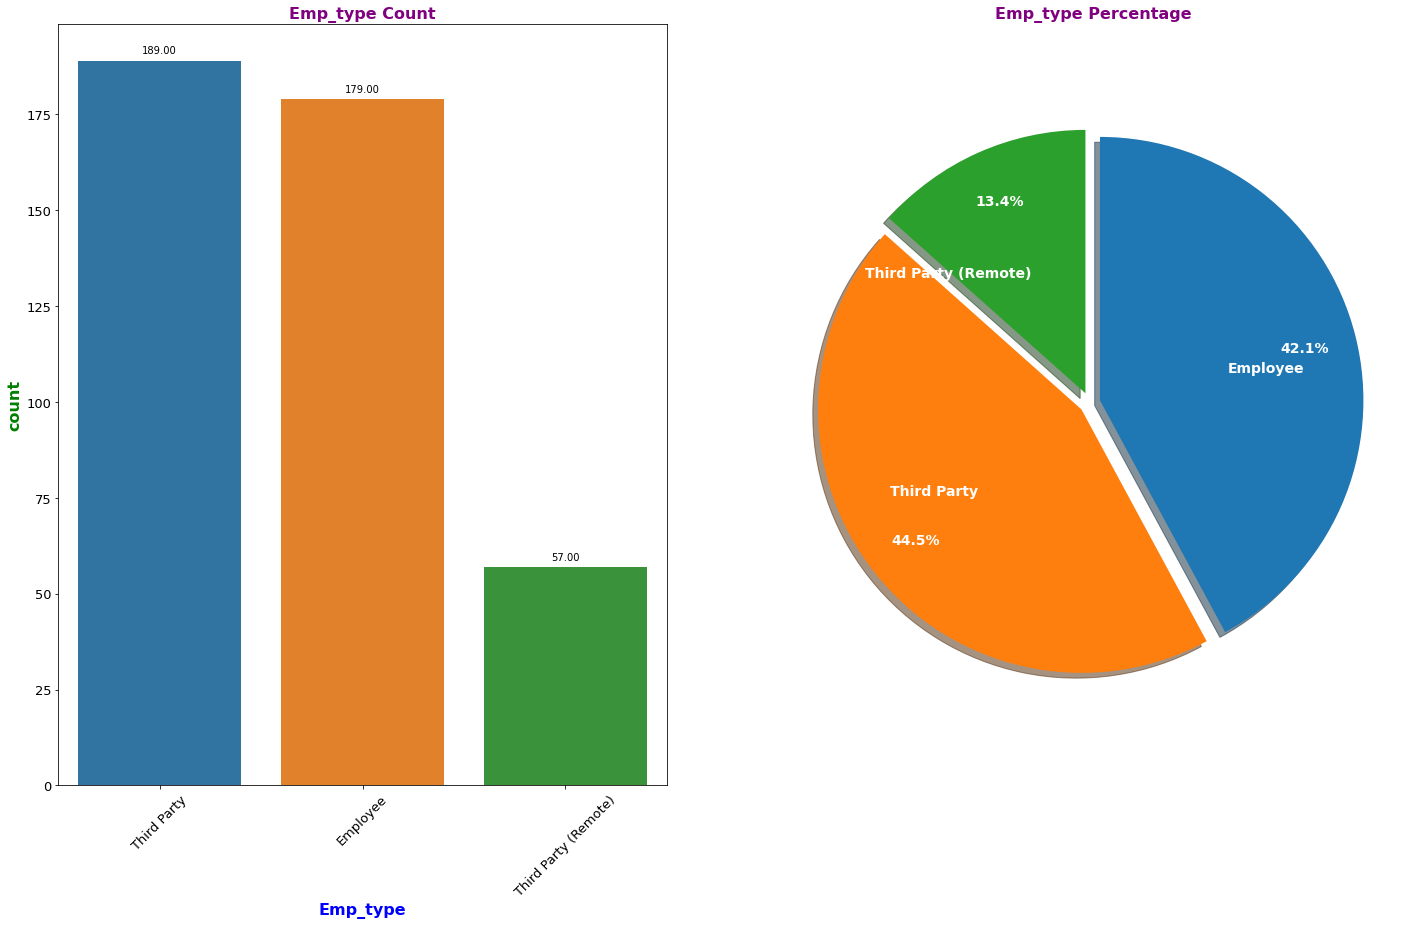

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Risk_Type:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


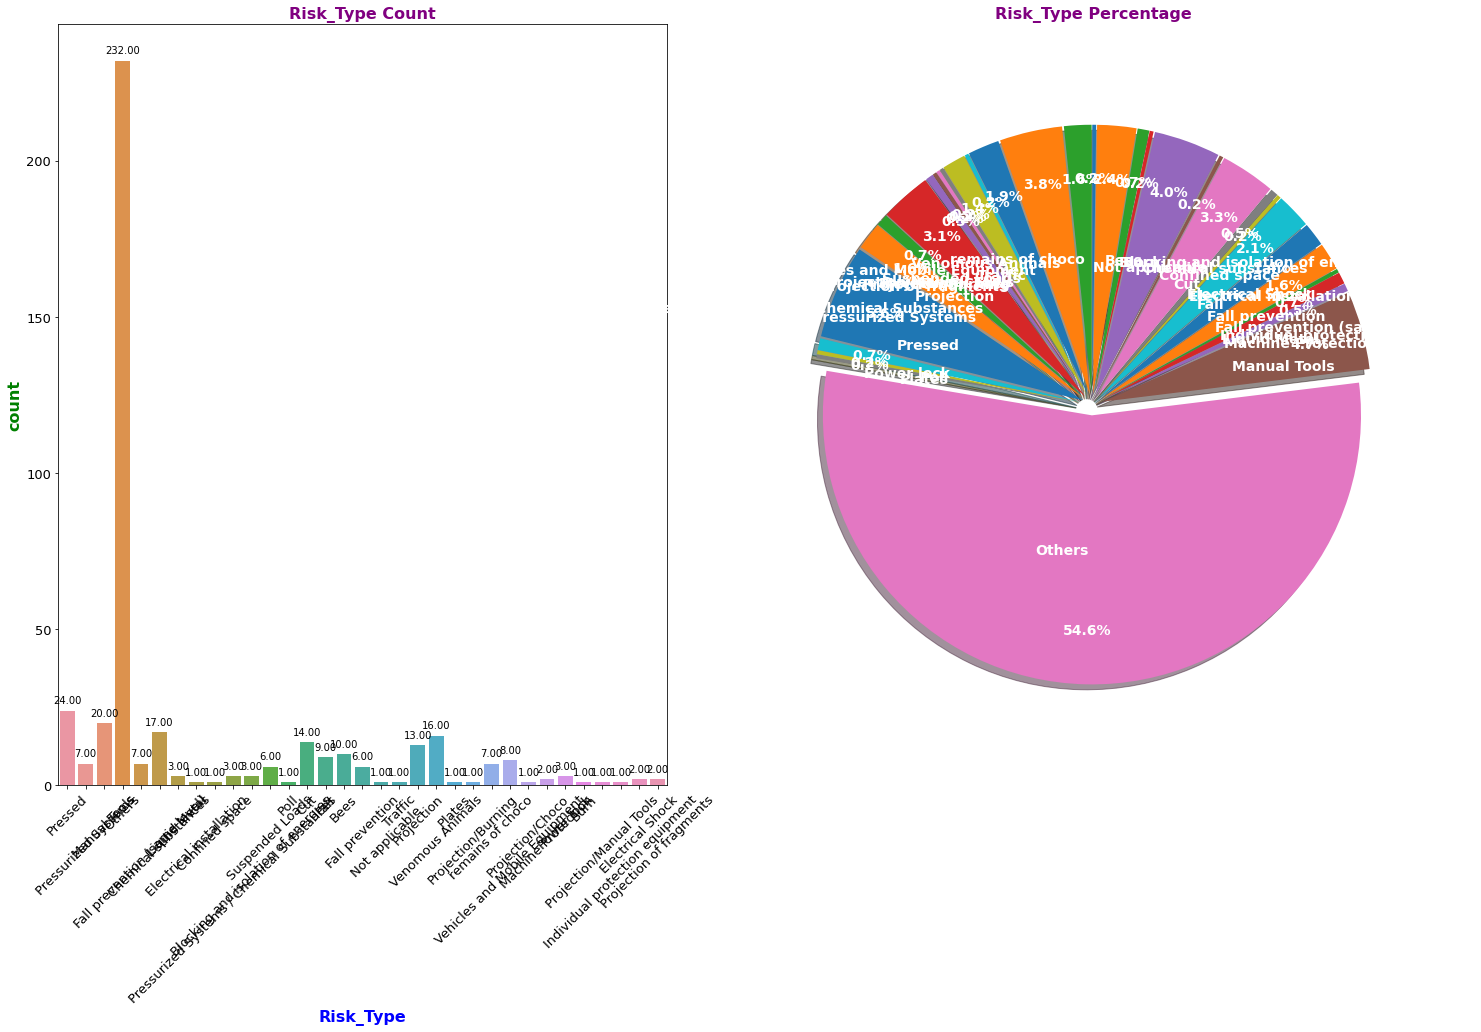

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Year:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


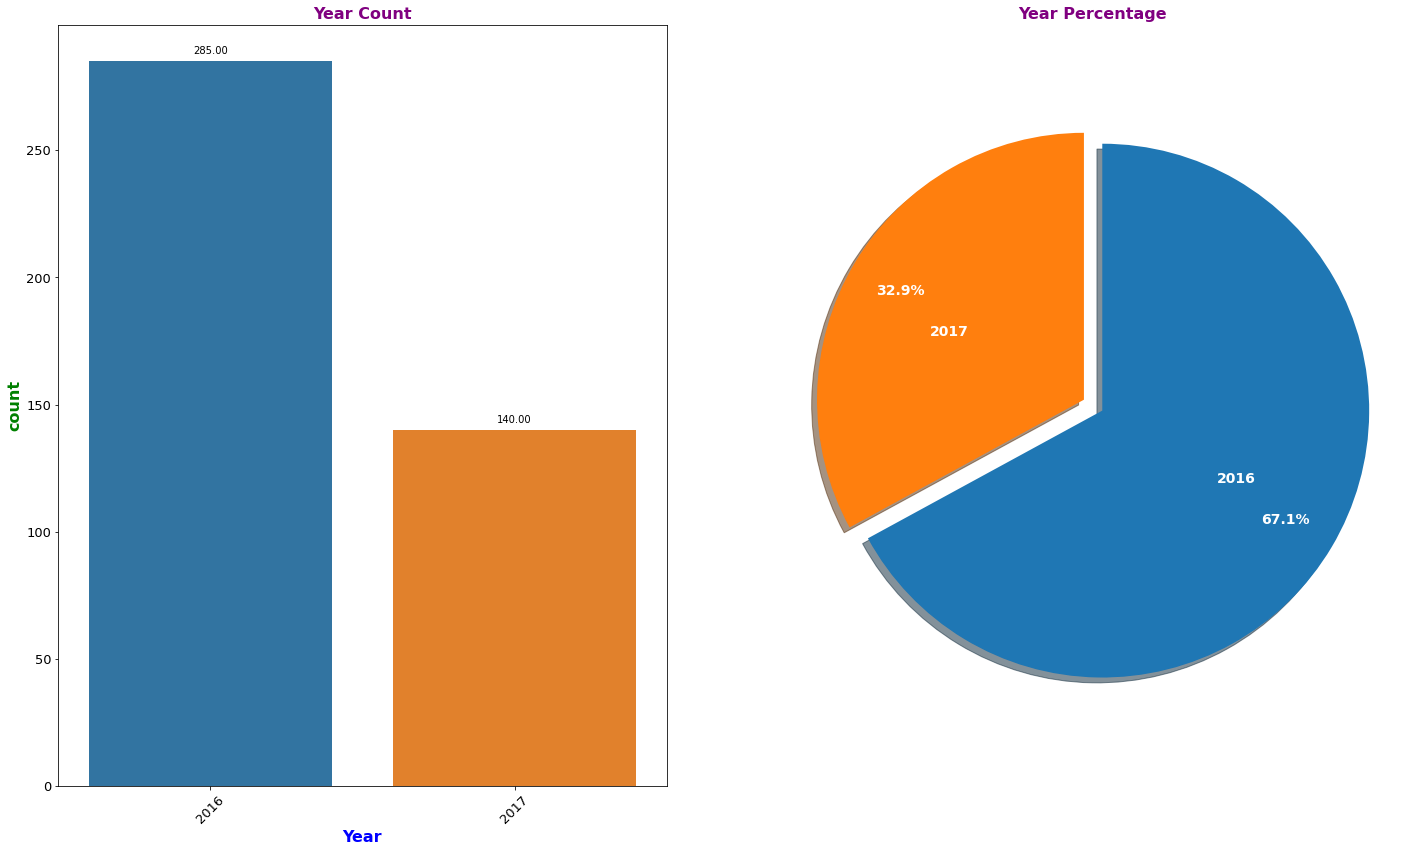

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Month:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


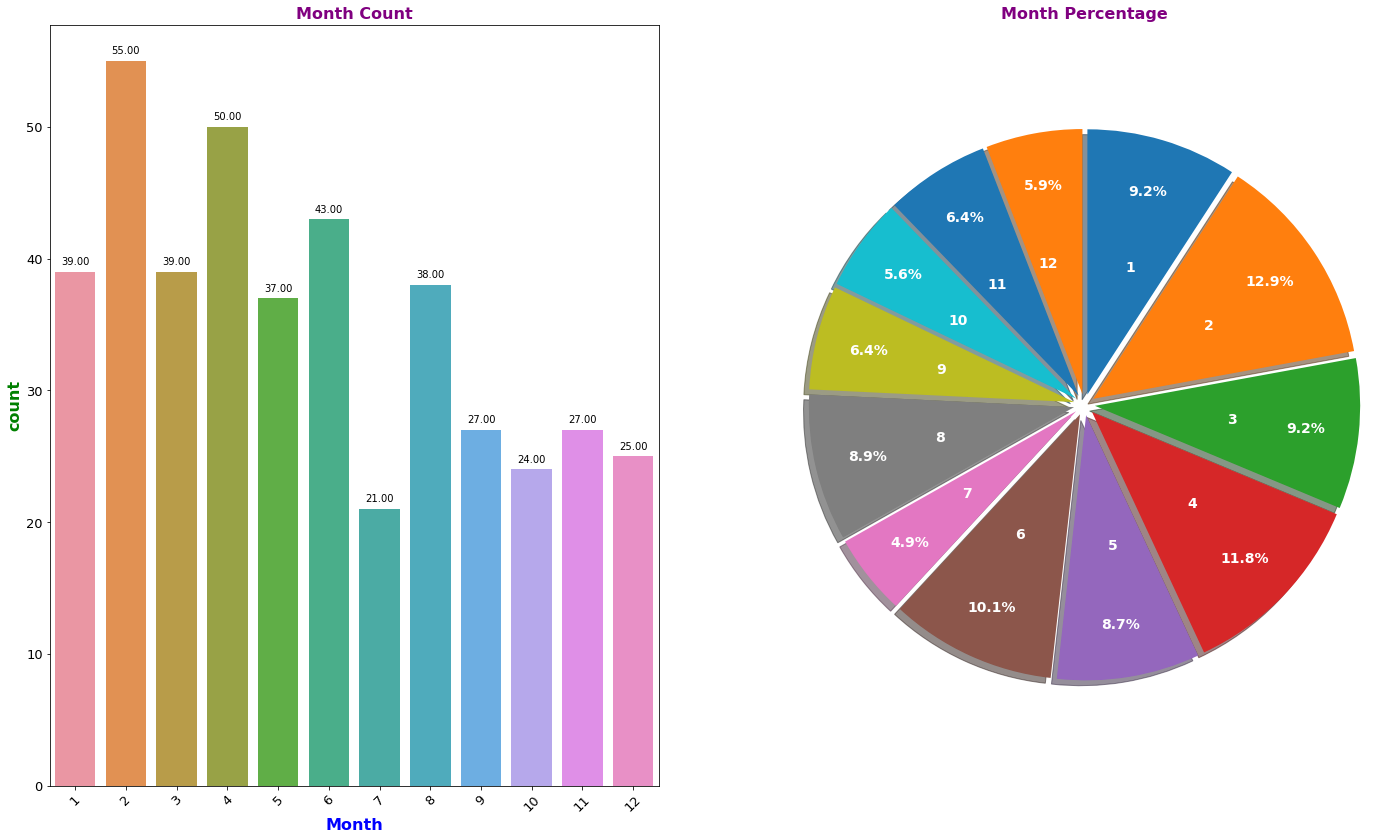

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Day:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


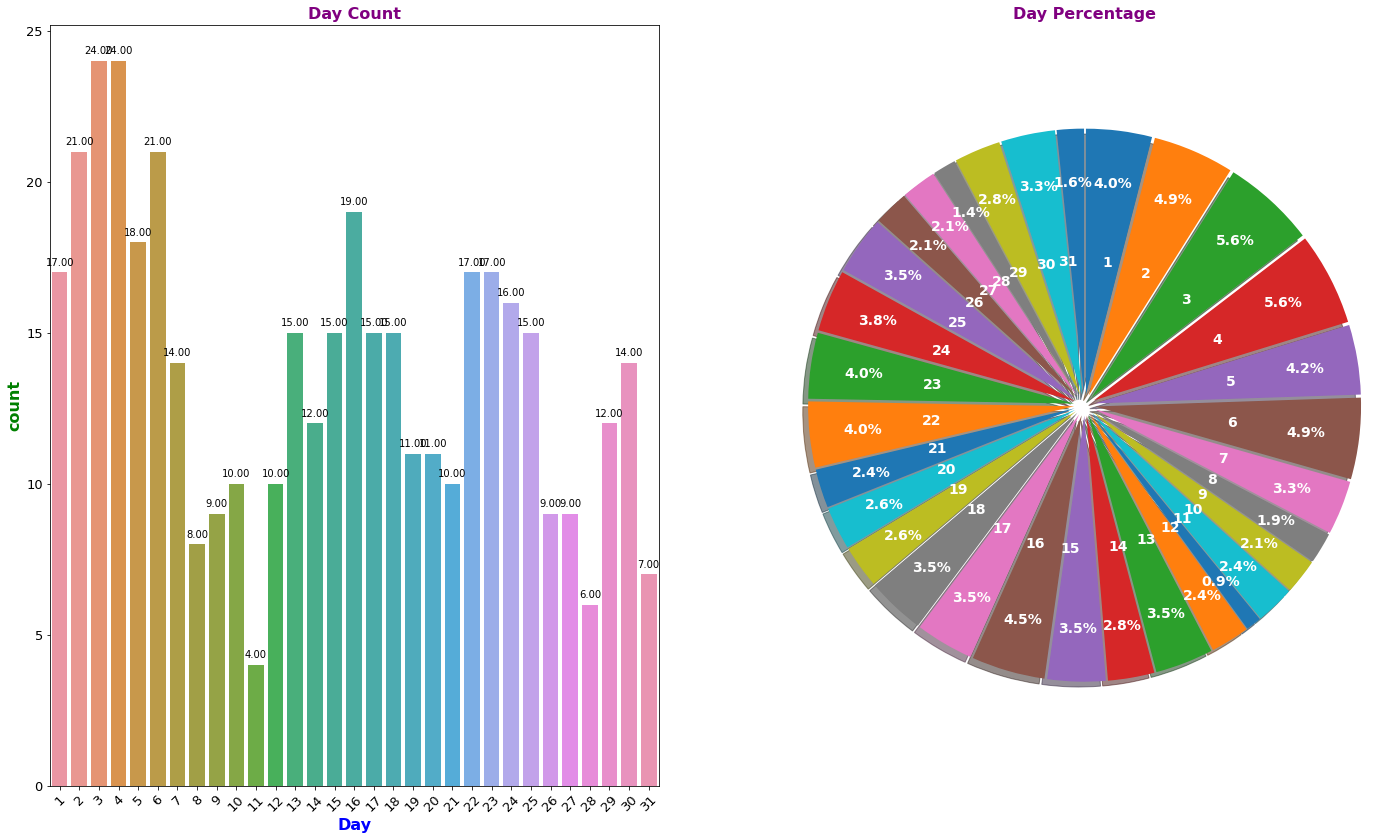

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Weekday:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


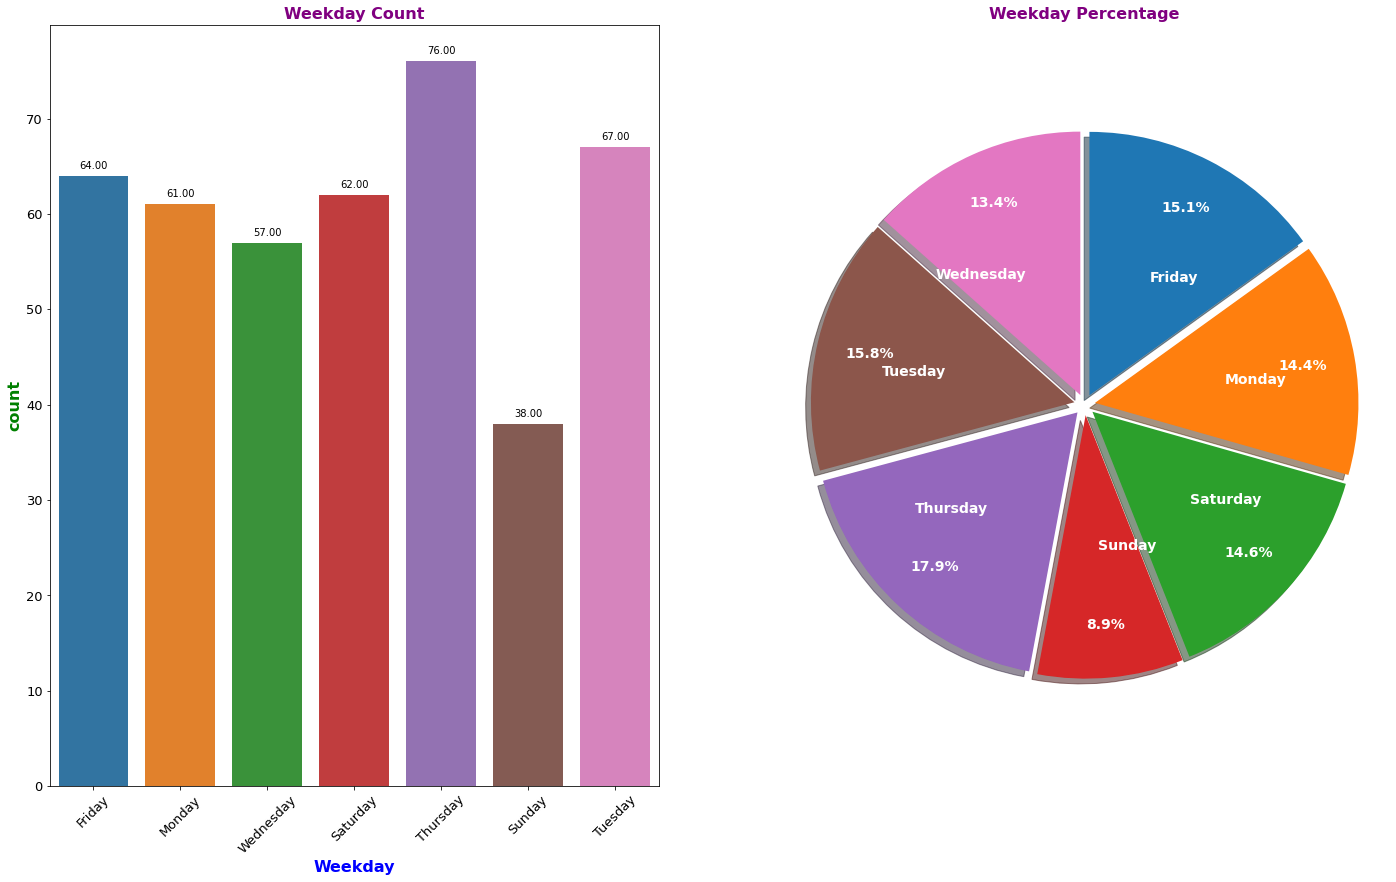

-----------------------------------------------------------------------------------------------------
ANALYSIS BY WeekofYear:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


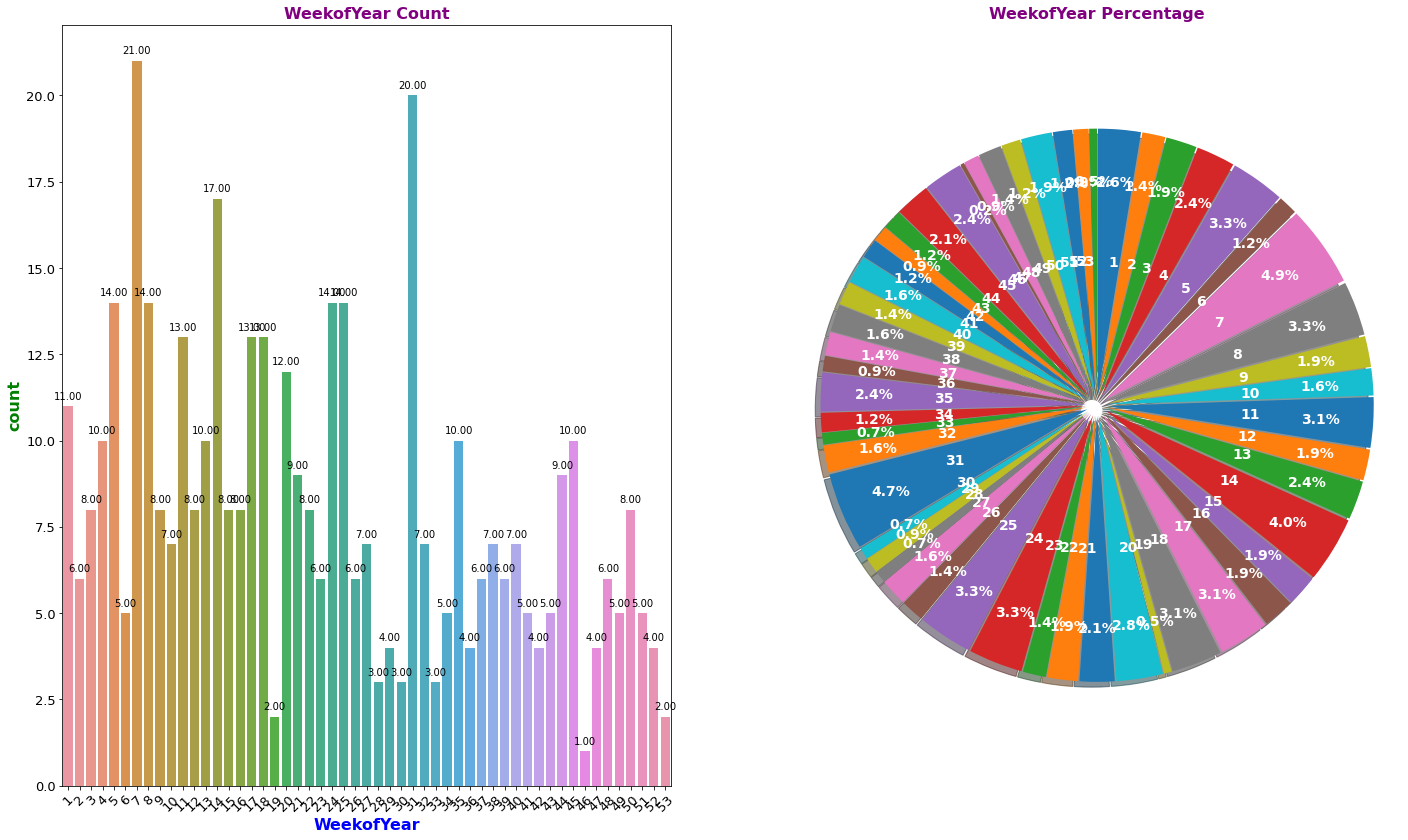

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Season:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


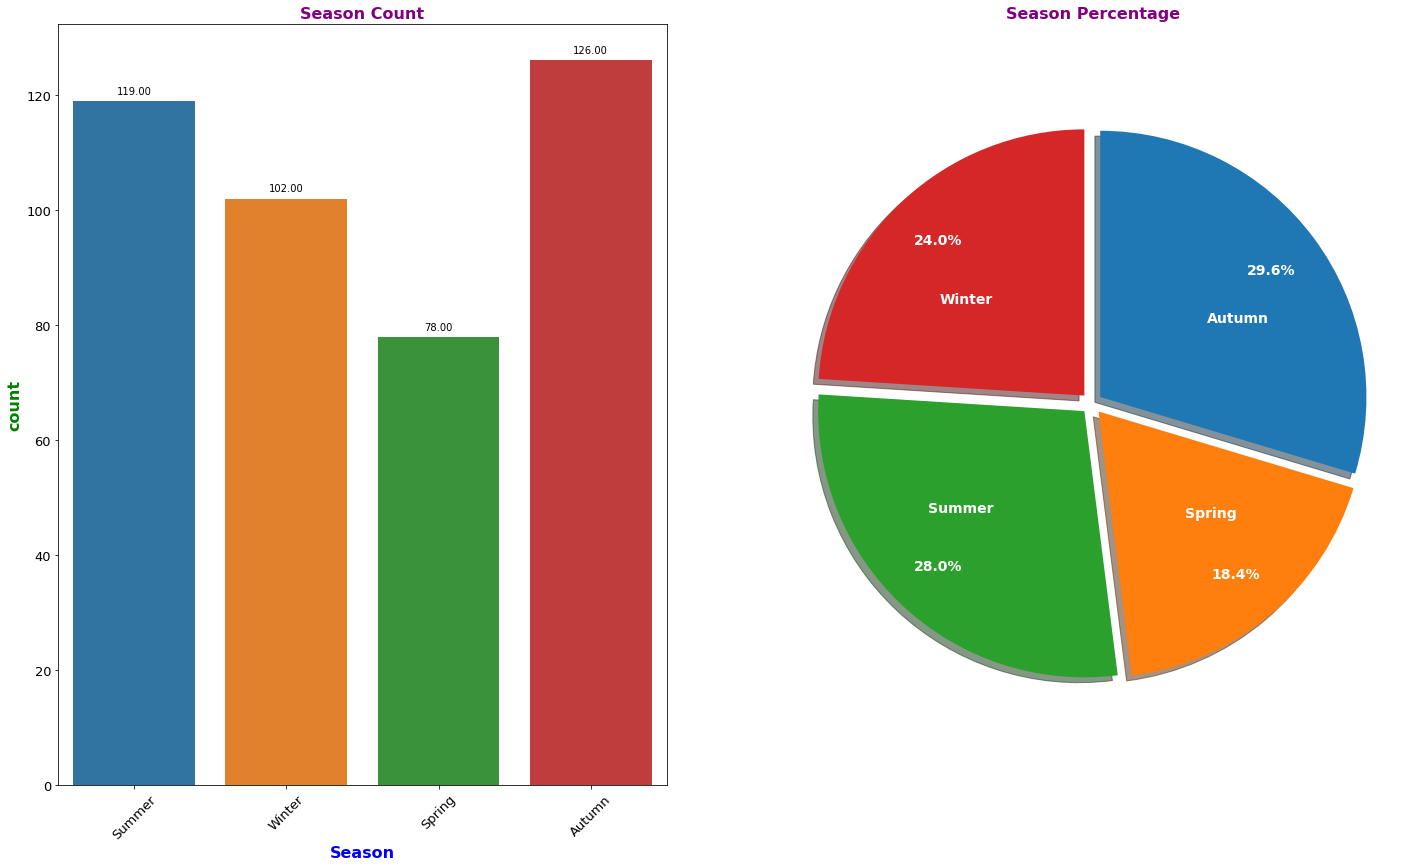

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Quarter:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


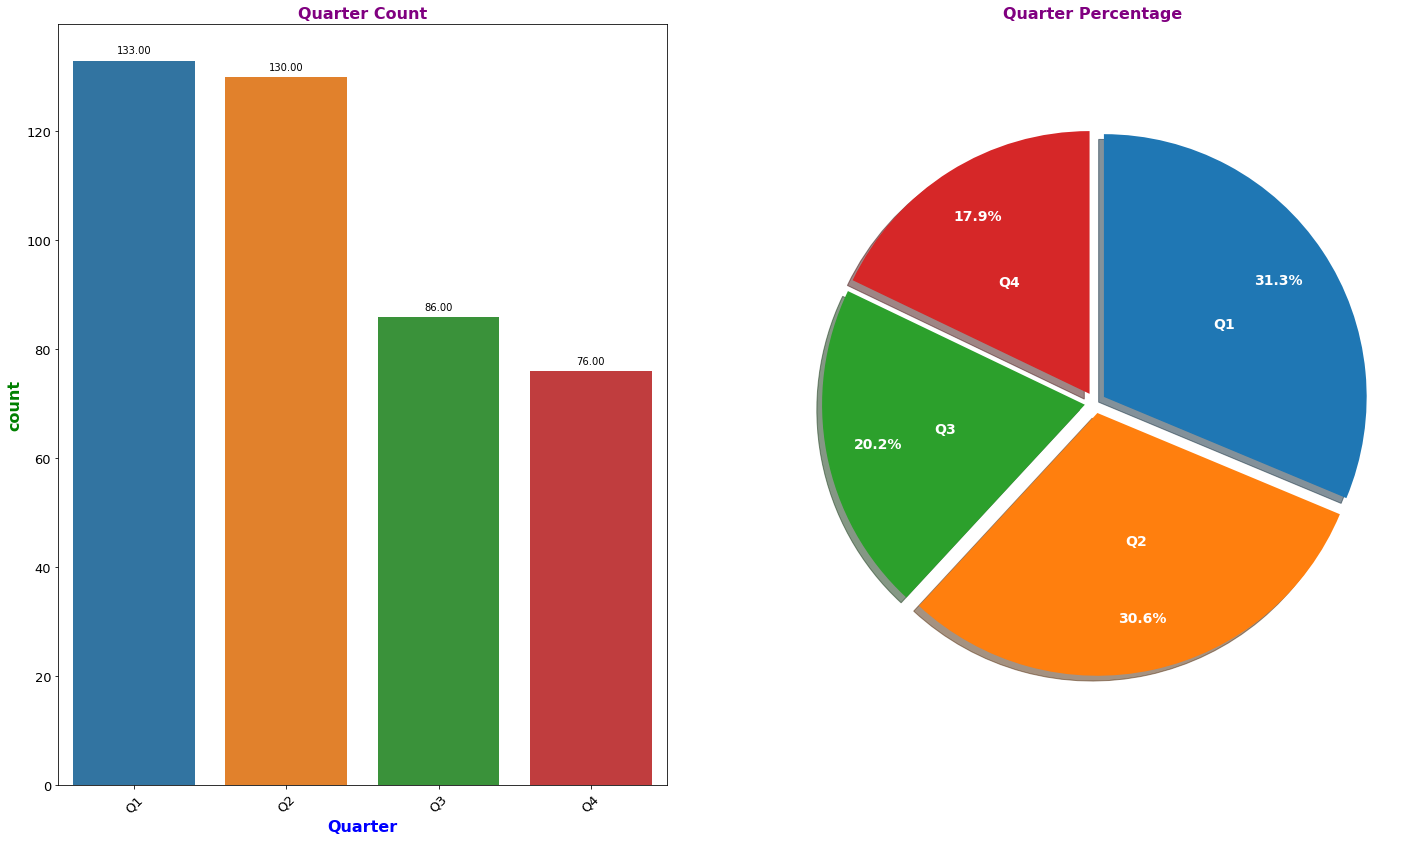

-----------------------------------------------------------------------------------------------------


In [23]:
for column in ['Country', 'Locality', 'Sector', 'Acc_level', 'Pot_Acc_Level','Gender', 'Emp_type', 'Risk_Type', 'Year', 'Month','Day', 'Weekday', 'WeekofYear', 'Season', 'Quarter']:
    print('ANALYSIS BY ' + column + ':')
    UniPlot(column)
    print('-----------------------------------------------------------------------------------------------------')

### **Univariate Analysis Summary**

> **Total 3 countries data available**

> **Country_01 recorded with highest incident (59%) amongst all 3 countries**

> **Country_01 recorded lowest (10.4%) amongst all 3 countires**


> **Total 12 localities data from 3 countries captured**

> **Local_03 recorded with highest incident amongst all 12 countries**

> **9 out of 12 localities have double digit incidents**

> **3 localities have single digit low incidents**


> **Total 3 Industrial sectors covered**

> **Mining recorded with highest incident - 56.7%**

> **Metals stands high next to Mining Sector - 31.5%**

> **Other sectors contribute lowest incidents - 11.8%**


> **Accident Level - I occured at high frequency 74.4%**

> **Accident Level - V occured at low frequency 1.9%**

> **High Level accidents are lower and Low Level accidents are higher**

> **Predicted Potential Accident Level - IV is at high frequency 33.6%**

> **Predicted Potential Accident Level - VI is just 1 occasio - 0.2%**

> **Actual Accident levels are different than Predicted Potential Accident Level**

> **Males are high prone to exposed to Accident (94.8% compare to Females (5.2%)**

> **Third Party Employees and Direct Employees are more prone to Accident than Remote working third party**

> **Accidents are categories into 33 types of Risk Types**

> **Undefined other type of Risks contribute to 54.6% accident**

> **It indicates deep investigation and proactive approaches - FMEA/RCA are needed to identify the type of risks**

> **Y-2017 Accident is halved Y-2016 - Good controls in Accidents and safety performance**

> **In general Accident occurs through the year irrespective of months**

> **However in the month of Feb and Apr accident level is high**

> **July, Oct & Dec have 50% of reduced accident level than Feb & Apr**

> **Beginning of every month have more accidents.**

> **End of the the month relatively accidents are at lower side**

> **Except Sunday all other days there is a accident**

> **However Sunday also Accident occurs**

> **Almost equal amount of accident occurs across all seasons except Spring**

### **Time Series Graph**

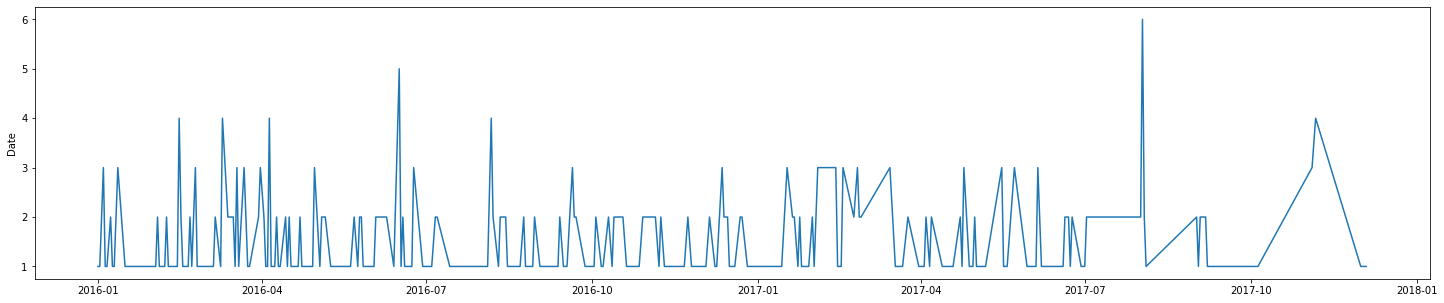

In [49]:
f, axes = plt.subplots(1,1,figsize=(25,5))
sns.lineplot(data = df['Date'].value_counts())

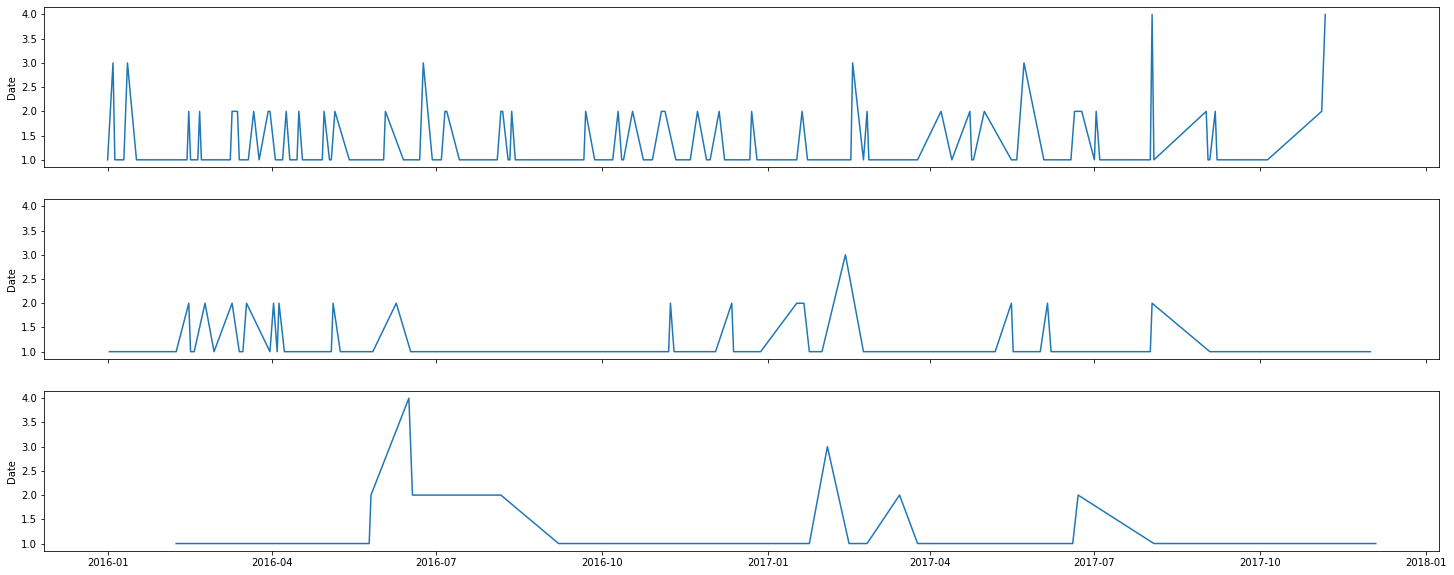

In [68]:
f, axes = plt.subplots(3,1,figsize=(25,10),sharex=True,sharey=True)
ax=0
for country in df['Country'].unique():
    sns.lineplot(data = df[df['Country']==country]['Date'].value_counts(),ax = axes[ax],)
    ax=ax+1

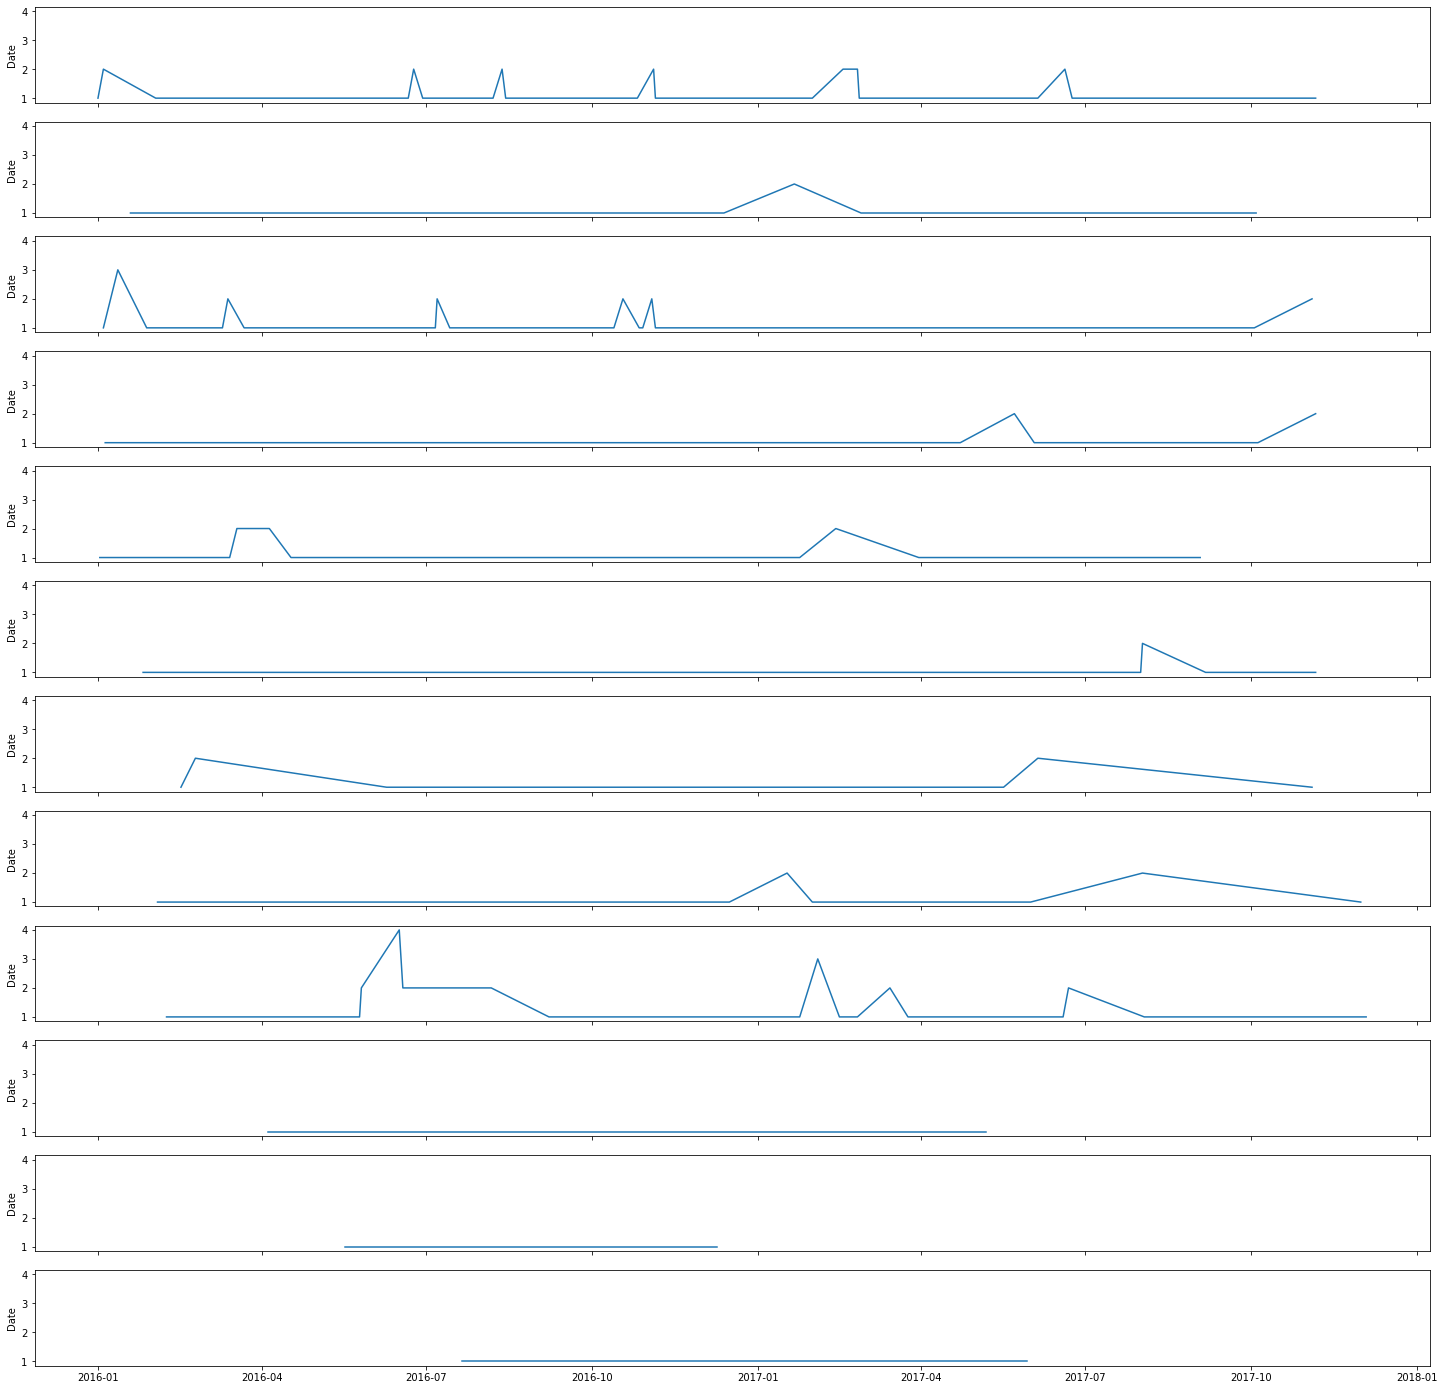

In [70]:
f, axes = plt.subplots(12,1,figsize=(25,25),sharex=True,sharey=True)
ax=0
for Locality in df['Locality'].unique():
  sns.lineplot(data = df[df['Locality']==Locality]['Date'].value_counts(),ax = axes[ax])
  ax=ax+1

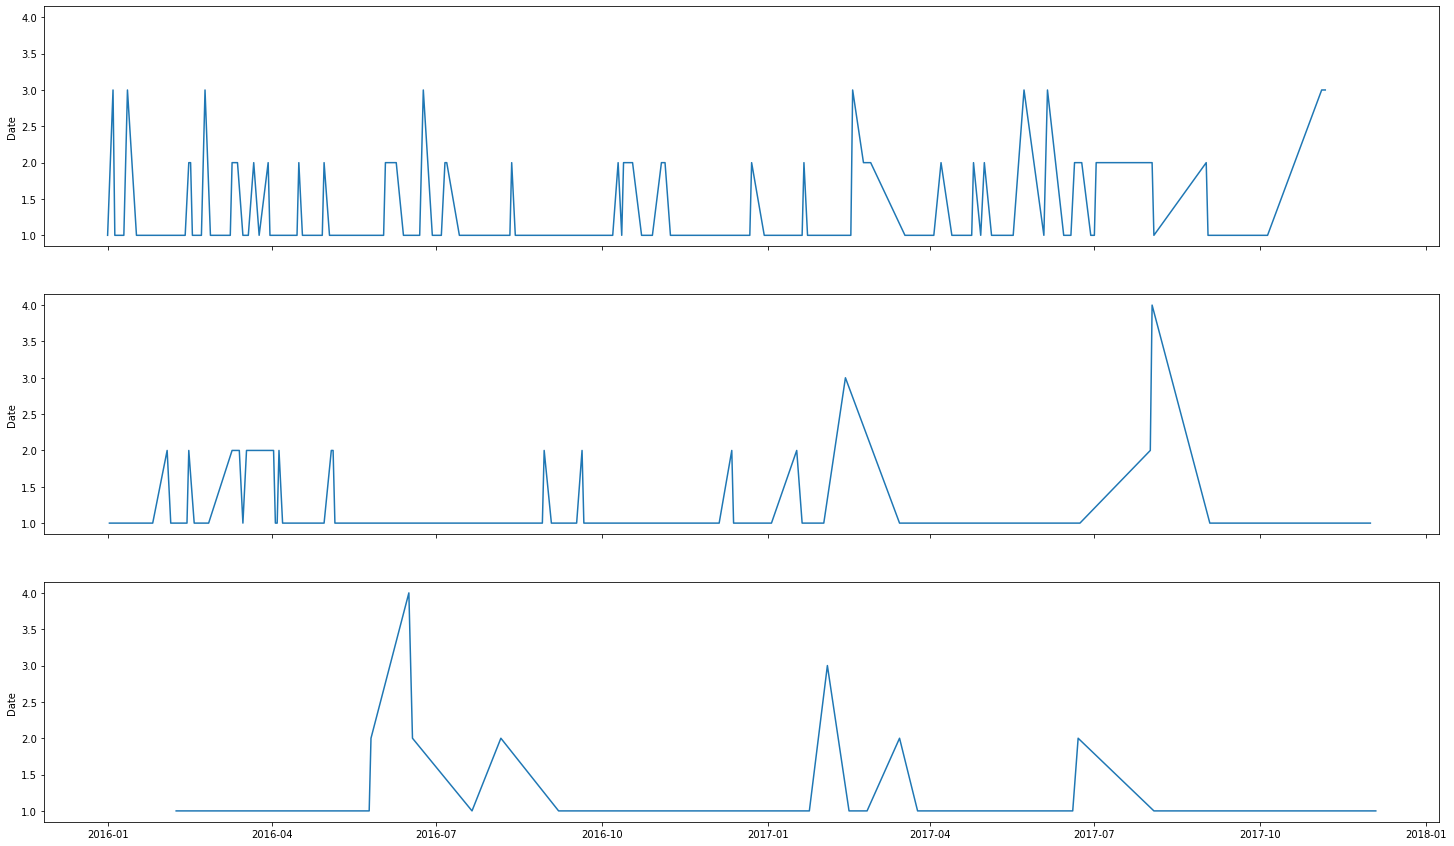

In [78]:
f, axes = plt.subplots(3,1,figsize=(25,15),sharex=True,sharey=True)
ax=0
for sector in df['Sector'].unique():
    sns.lineplot(data = df[df['Sector']==sector]['Date'].value_counts(),ax = axes[ax])
    ax=ax+1

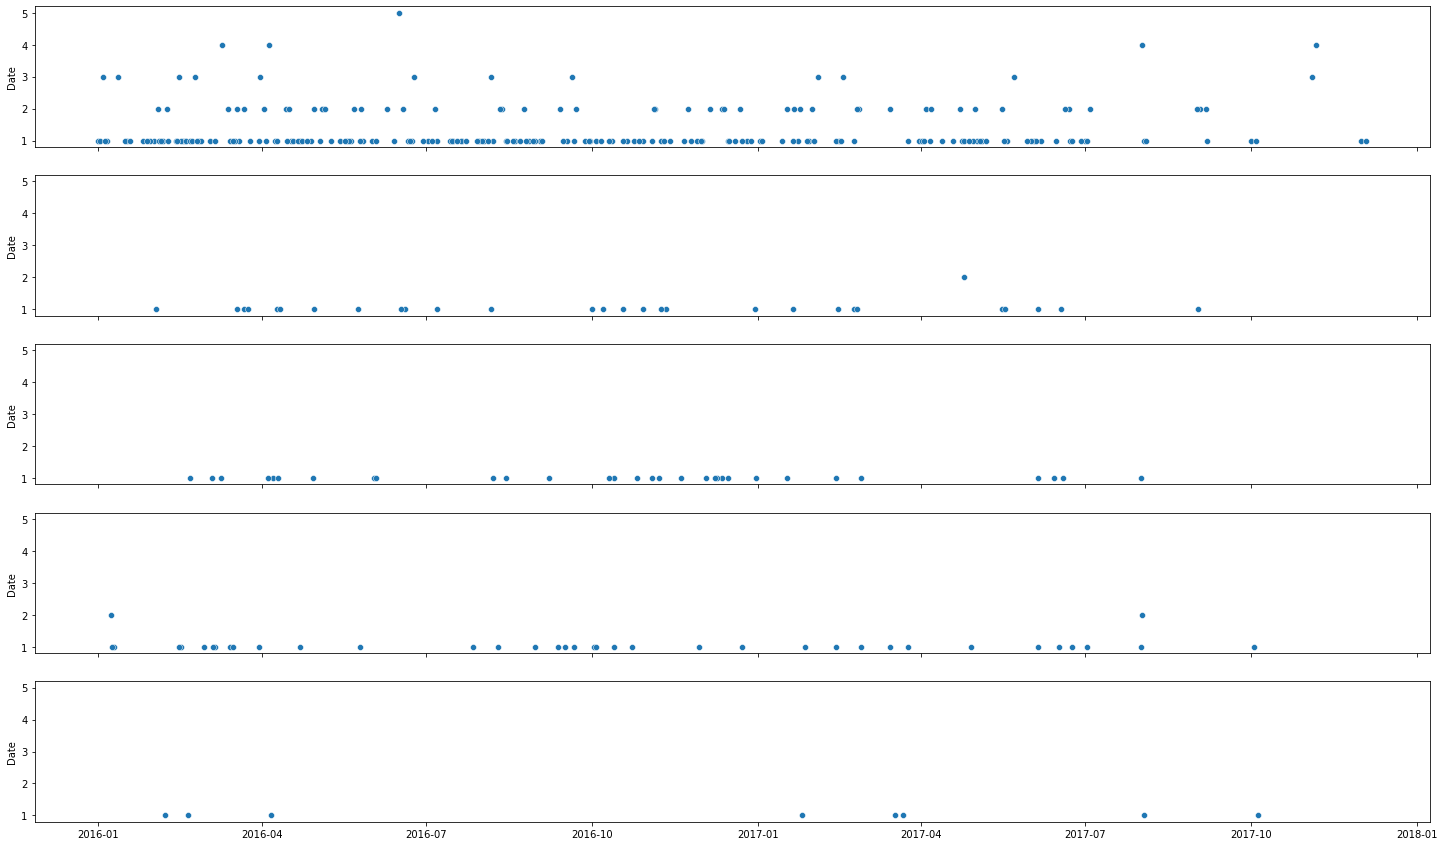

In [90]:
f, axes = plt.subplots(5,1,figsize=(25,15),sharex=True,sharey=True)
ax=0
for AL in df['Acc_level'].unique():
    sns.scatterplot(data = df[df['Acc_level']==AL]['Date'].value_counts(),ax = axes[ax])
    ax=ax+1

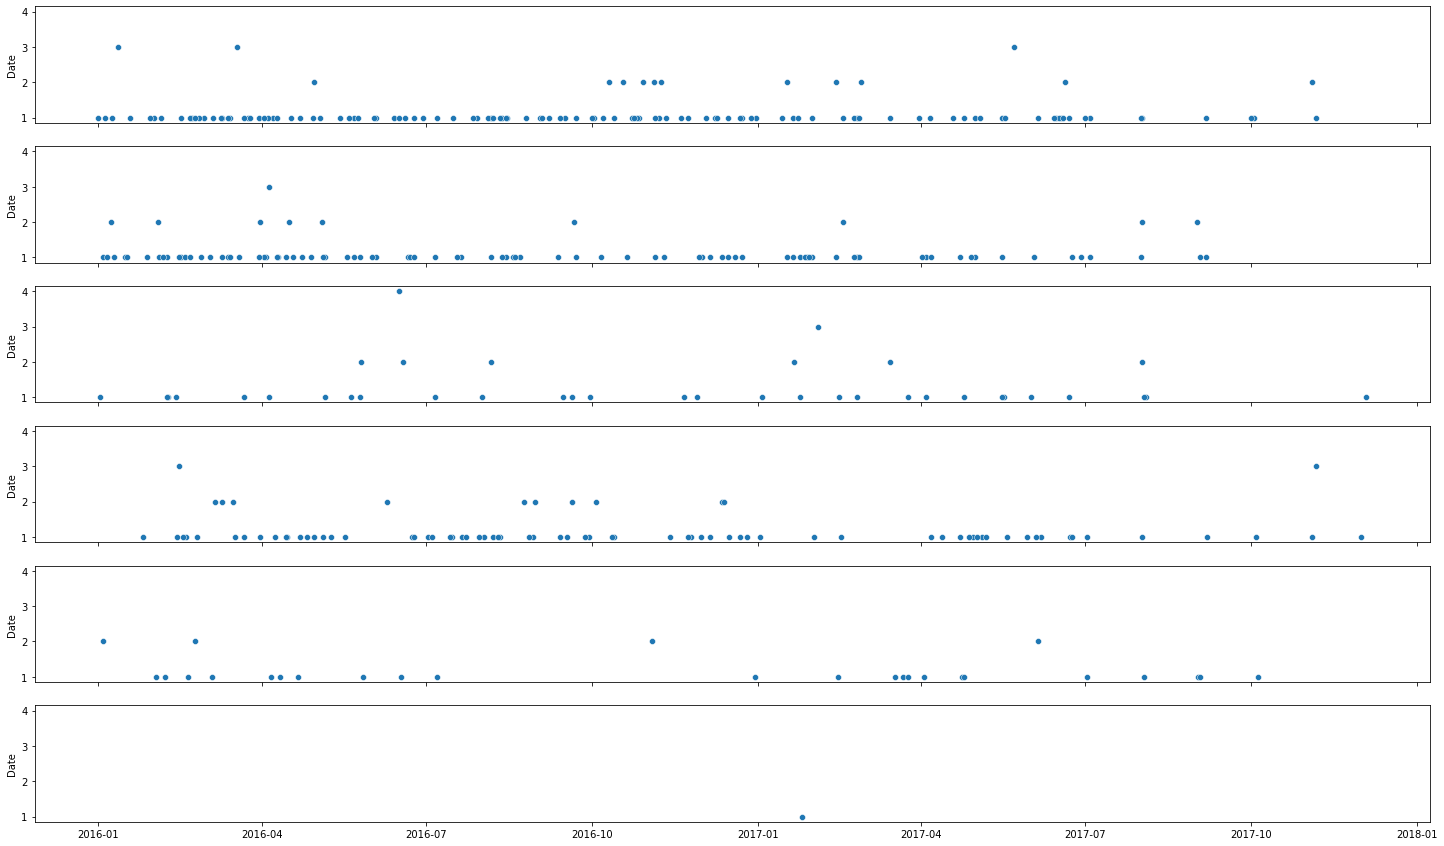

In [89]:
f, axes = plt.subplots(6,1,figsize=(25,15),sharex=True,sharey=True)
ax=0
for PAL in df['Pot_Acc_Level'].unique():
    sns.scatterplot(data = df[df['Pot_Acc_Level']==PAL]['Date'].value_counts(),ax = axes[ax])
    ax=ax+1

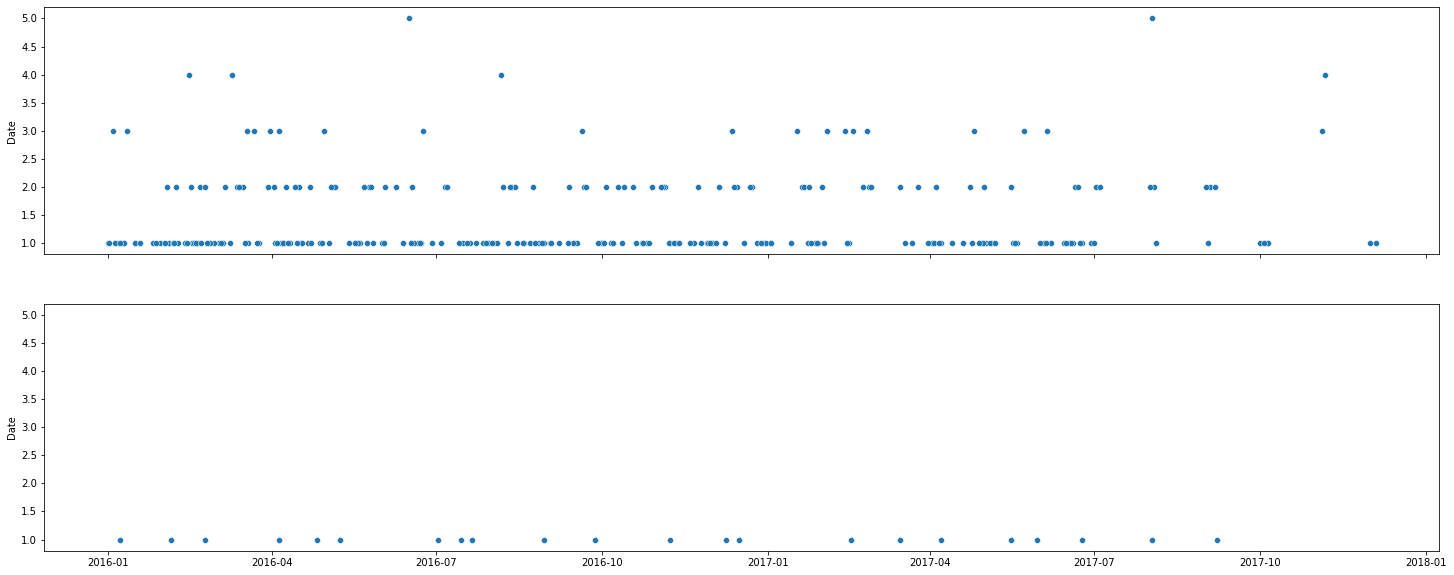

In [88]:
f, axes = plt.subplots(2,1,figsize=(25,10),sharex=True,sharey=True)
ax=0
for gen in df['Gender'].unique():
    sns.scatterplot(data = df[df['Gender']==gen]['Date'].value_counts(),ax = axes[ax])
    ax=ax+1

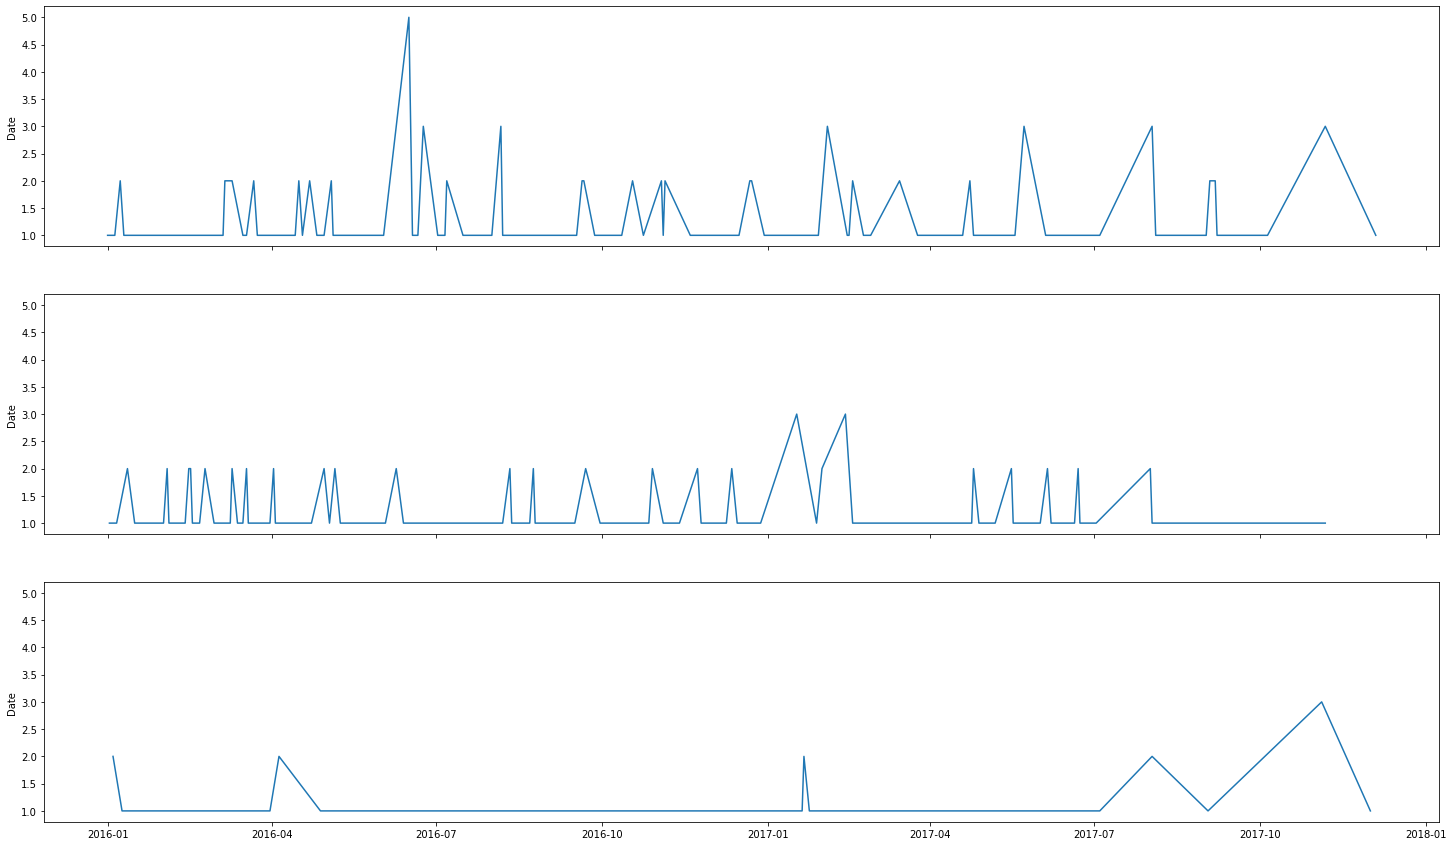

In [85]:
f, axes = plt.subplots(3,1,figsize=(25,15),sharex=True,sharey=True)
ax=0
for et in df['Emp_type'].unique():
    sns.lineplot(data = df[df['Emp_type']==et]['Date'].value_counts(),ax = axes[ax])
    ax=ax+1

In [50]:
df.columns

Index(['Date', 'Country', 'Locality', 'Sector', 'Acc_level', 'Pot_Acc_Level',
       'Gender', 'Emp_type', 'Risk_Type', 'Description', 'Year', 'Month',
       'Day', 'Weekday', 'WeekofYear', 'Season', 'Quarter'],
      dtype='object')

### **Bivariate Analysis**

In [24]:
# Bivariate analysis on Accident Level/Potential Accident levels
def BivarPlot(aCol):
    fig = plt.figure(figsize = (30, 10))
    ax = fig.add_subplot(121)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v',
                  hue = 'Acc_level').set_title(aCol.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Acc_level'].unique())
    plt.xticks(rotation = 45)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v', 
                  hue = 'Pot_Acc_Level').set_title(aCol.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Pot_Acc_Level'].unique())
    plt.xticks(rotation = 45)
    return plt.show()

ANALYSIS BY Country Acc_level / Pot_Acc_Level:


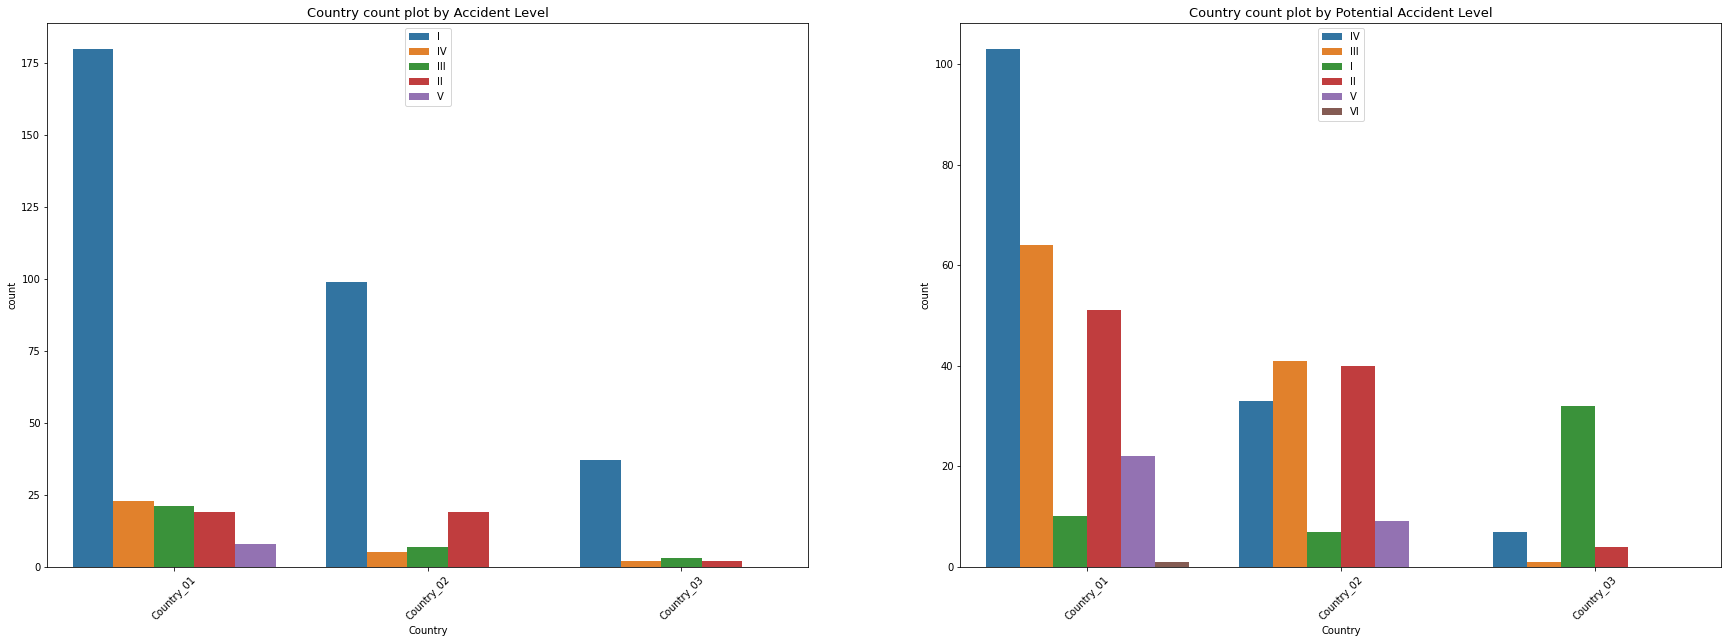

----------------------------------------------------------------------------
ANALYSIS BY Locality Acc_level / Pot_Acc_Level:


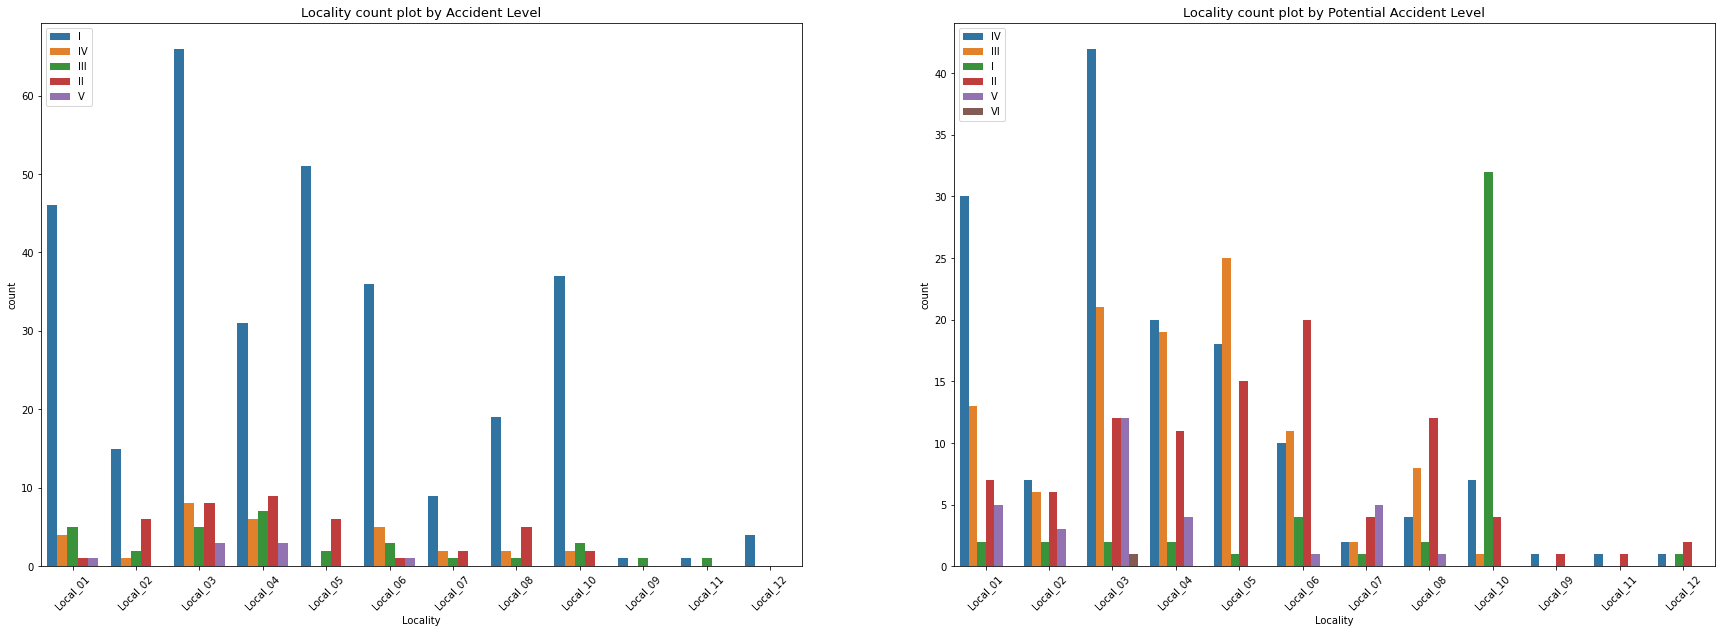

----------------------------------------------------------------------------
ANALYSIS BY Sector Acc_level / Pot_Acc_Level:


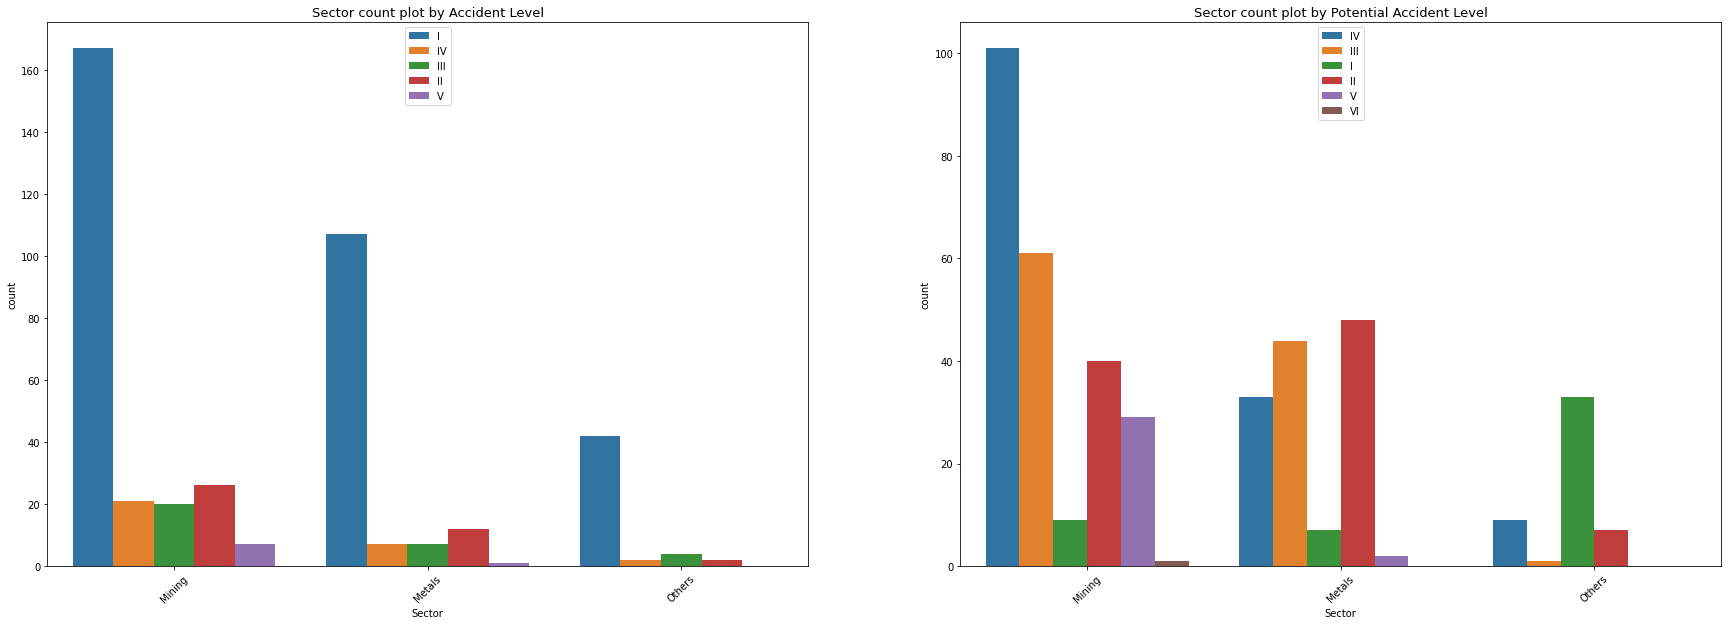

----------------------------------------------------------------------------
ANALYSIS BY Gender Acc_level / Pot_Acc_Level:


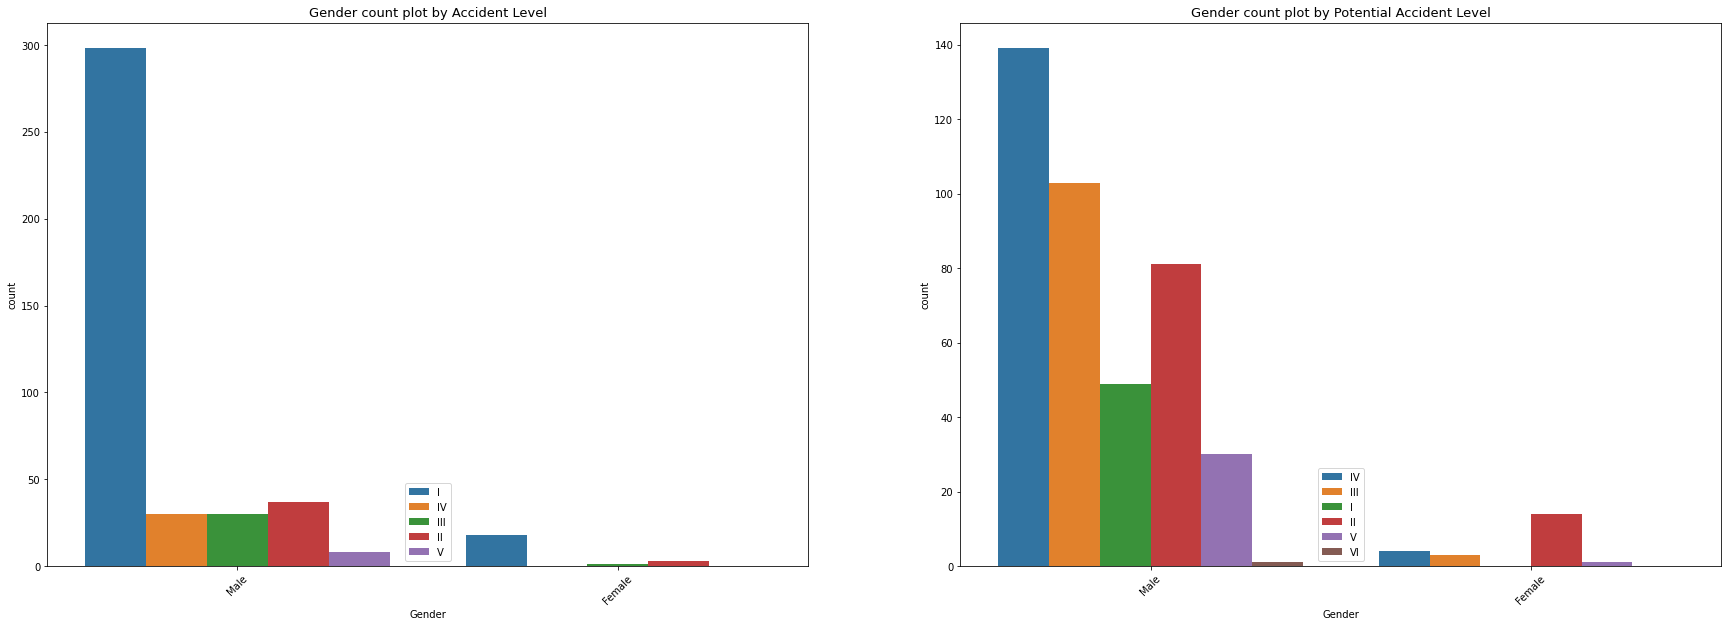

----------------------------------------------------------------------------
ANALYSIS BY Emp_type Acc_level / Pot_Acc_Level:


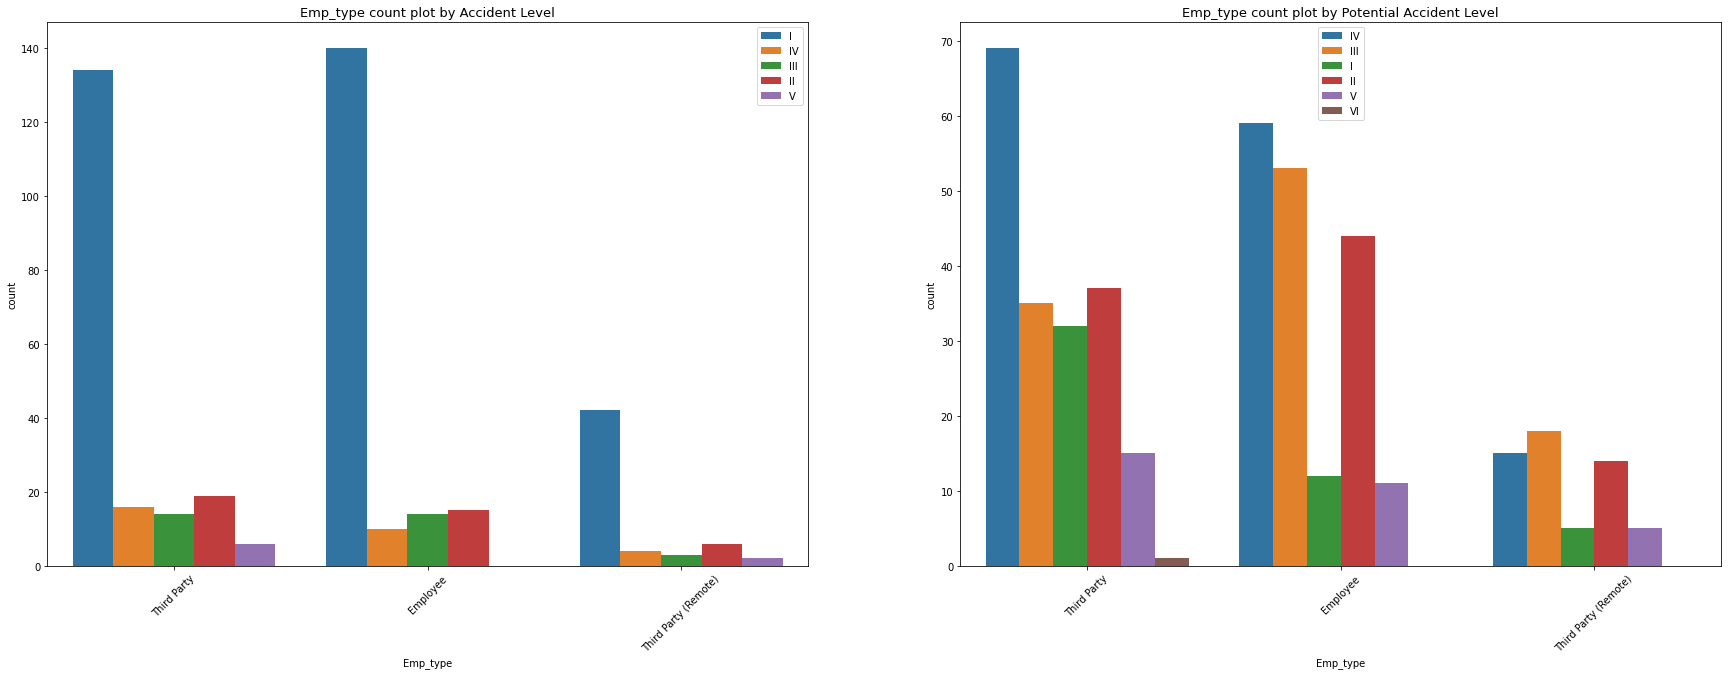

----------------------------------------------------------------------------
ANALYSIS BY Year Acc_level / Pot_Acc_Level:


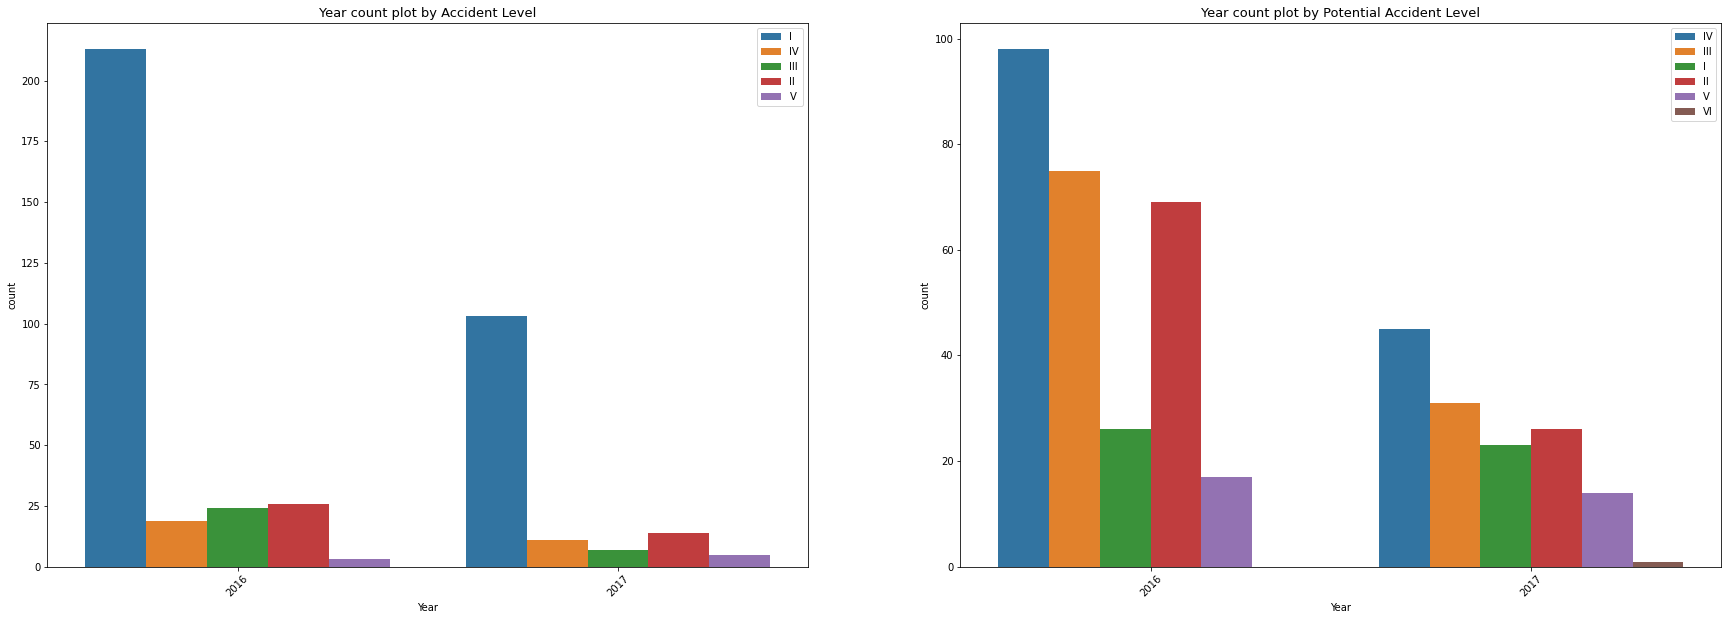

----------------------------------------------------------------------------
ANALYSIS BY Month Acc_level / Pot_Acc_Level:


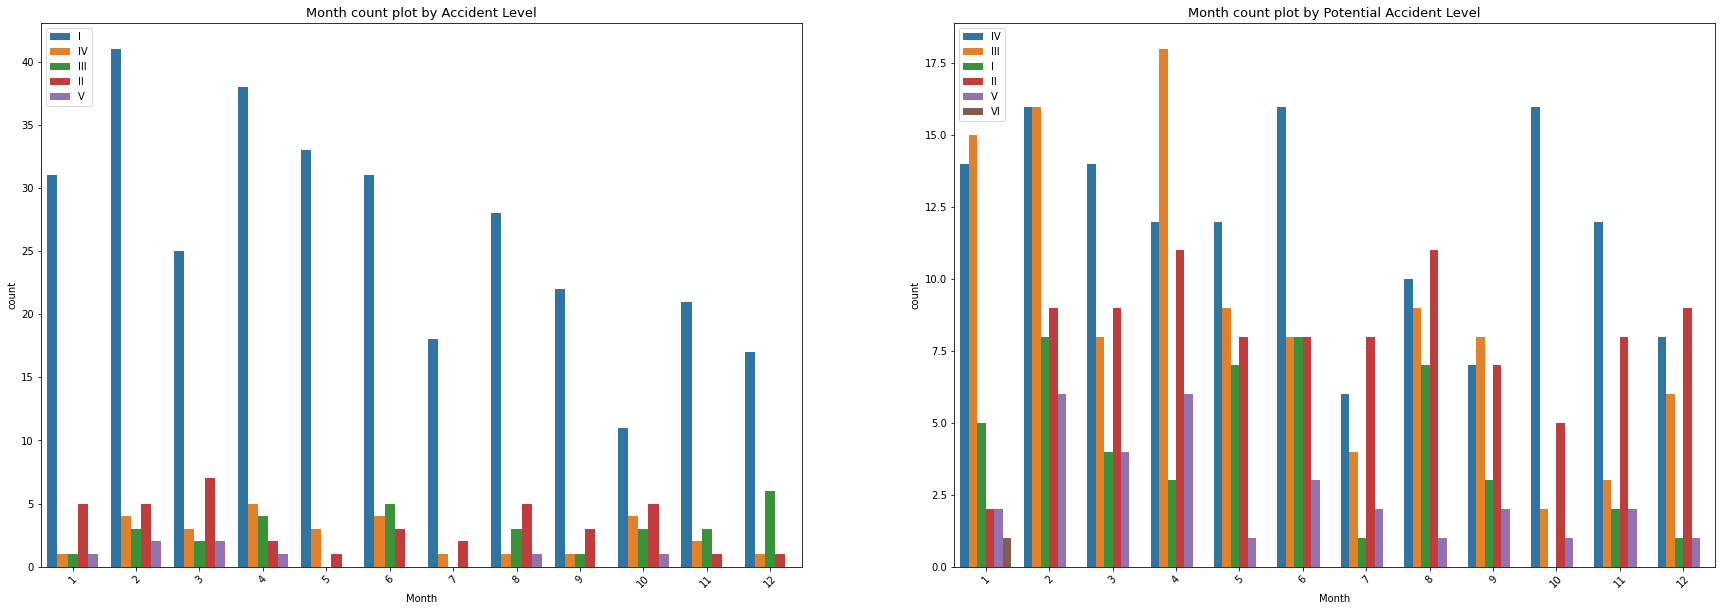

----------------------------------------------------------------------------
ANALYSIS BY Weekday Acc_level / Pot_Acc_Level:


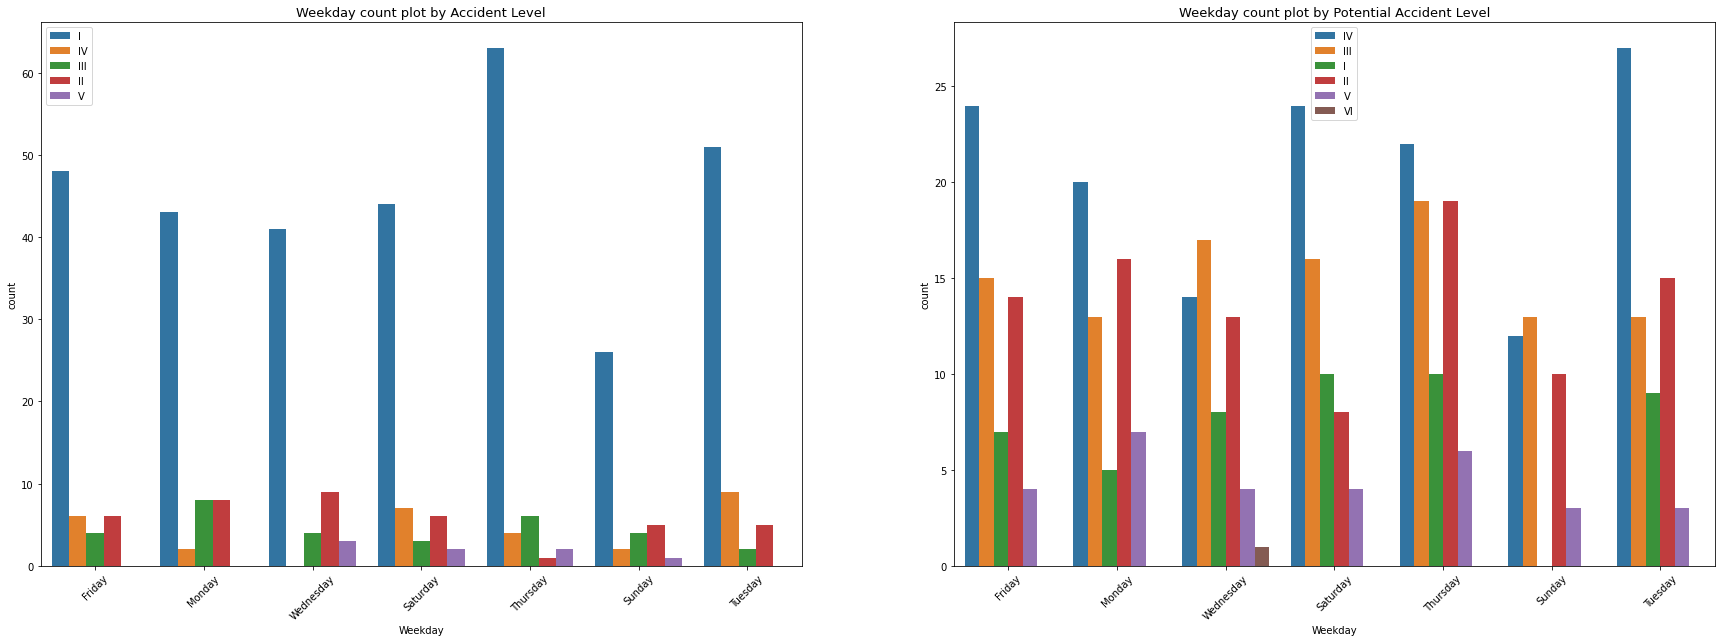

----------------------------------------------------------------------------
ANALYSIS BY Season Acc_level / Pot_Acc_Level:


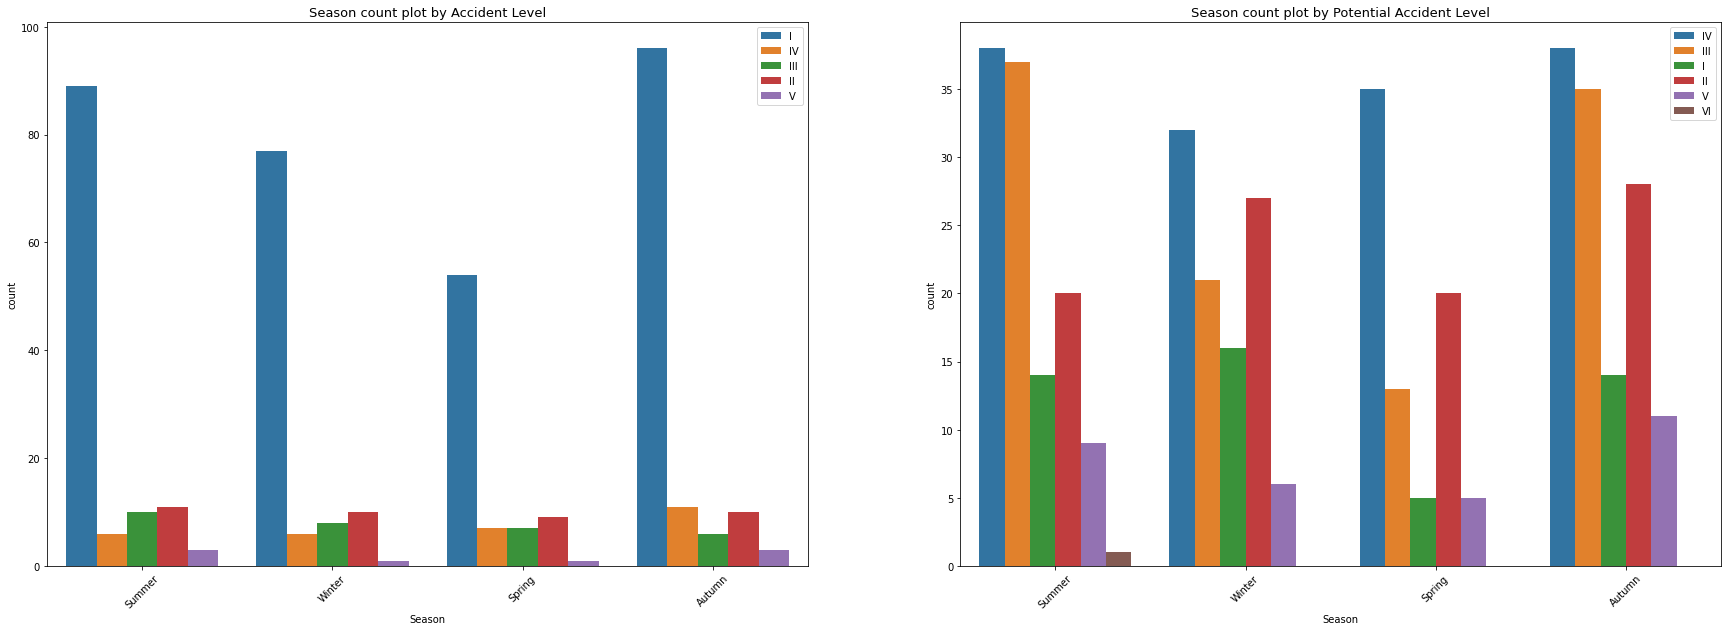

----------------------------------------------------------------------------
ANALYSIS BY Quarter Acc_level / Pot_Acc_Level:


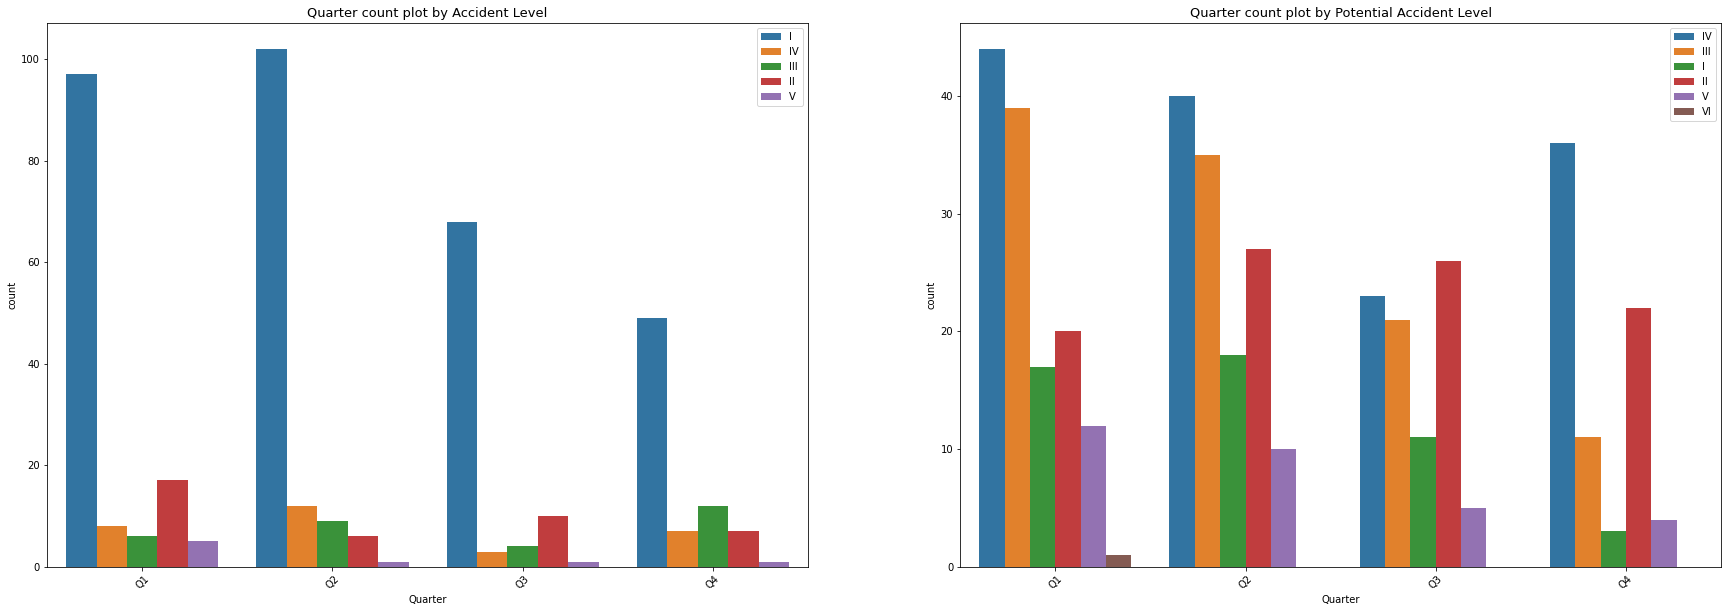

----------------------------------------------------------------------------


In [25]:
for column in ['Country', 'Locality', 'Sector', 'Gender', 'Emp_type', 'Year', 'Month', 'Weekday','Season', 'Quarter']:
    print('ANALYSIS BY ' + column + ' Acc_level / Pot_Acc_Level:')
    BivarPlot(column)
    print('----------------------------------------------------------------------------')

### **Bi-Vairate Analysis Summary**

### **Multivariate Analysis**

In [26]:
def MulvarPlot(aCol):
    fig = plt.figure(figsize = (30, 10))
    ax = fig.add_subplot(121)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v',
                  hue = 'Sector').set_title(aCol.capitalize() +' count plot by Sector', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Sector'].unique())
    plt.xticks(rotation = 45)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v', 
                  hue = 'Gender').set_title(aCol.capitalize() +' count plot by Gender', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Gender'].unique())
    plt.xticks(rotation = 45)
    return plt.show()

In [27]:
df.columns

Index(['Date', 'Country', 'Locality', 'Sector', 'Acc_level', 'Pot_Acc_Level',
       'Gender', 'Emp_type', 'Risk_Type', 'Description', 'Year', 'Month',
       'Day', 'Weekday', 'WeekofYear', 'Season', 'Quarter'],
      dtype='object')

ANALYSIS BY Country on Sector / Gender:


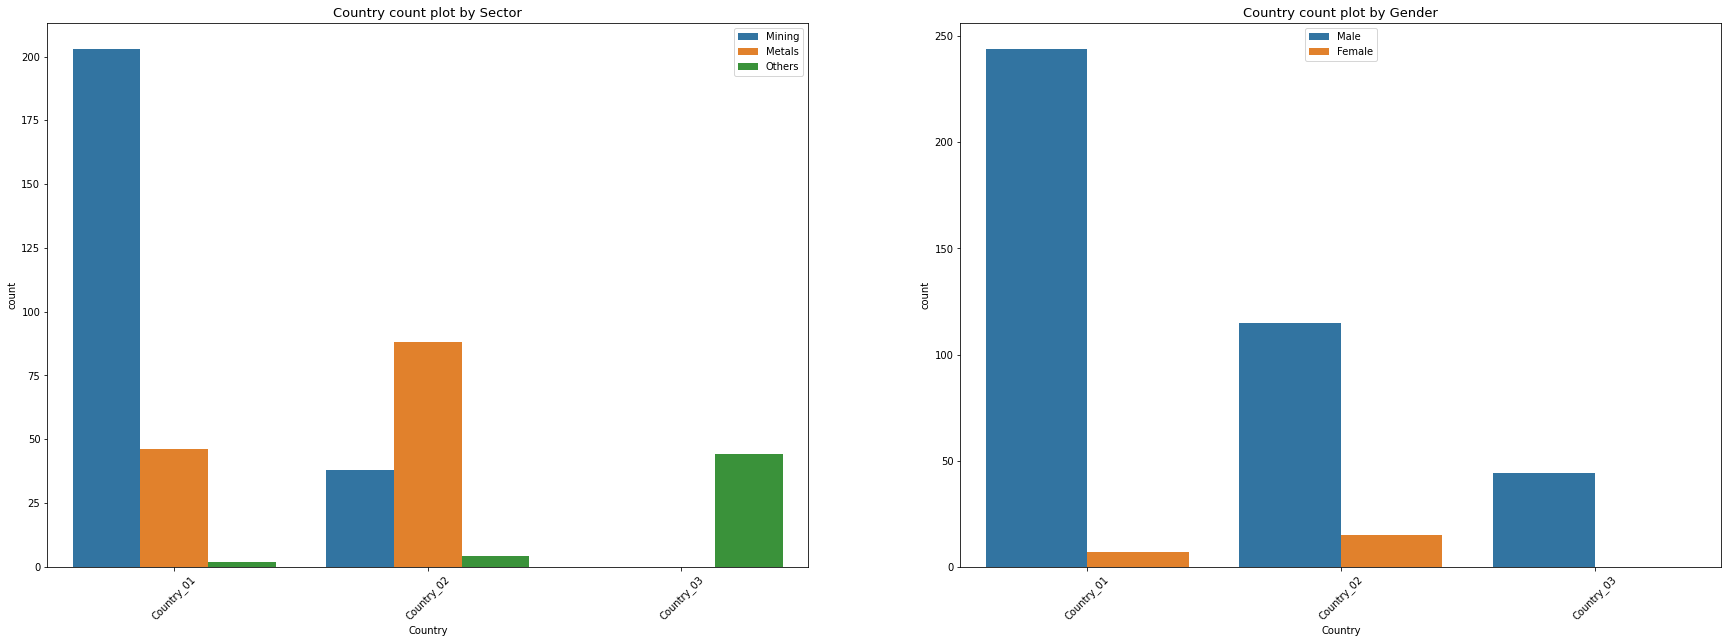

----------------------------------------------------------------------------
ANALYSIS BY Locality on Sector / Gender:


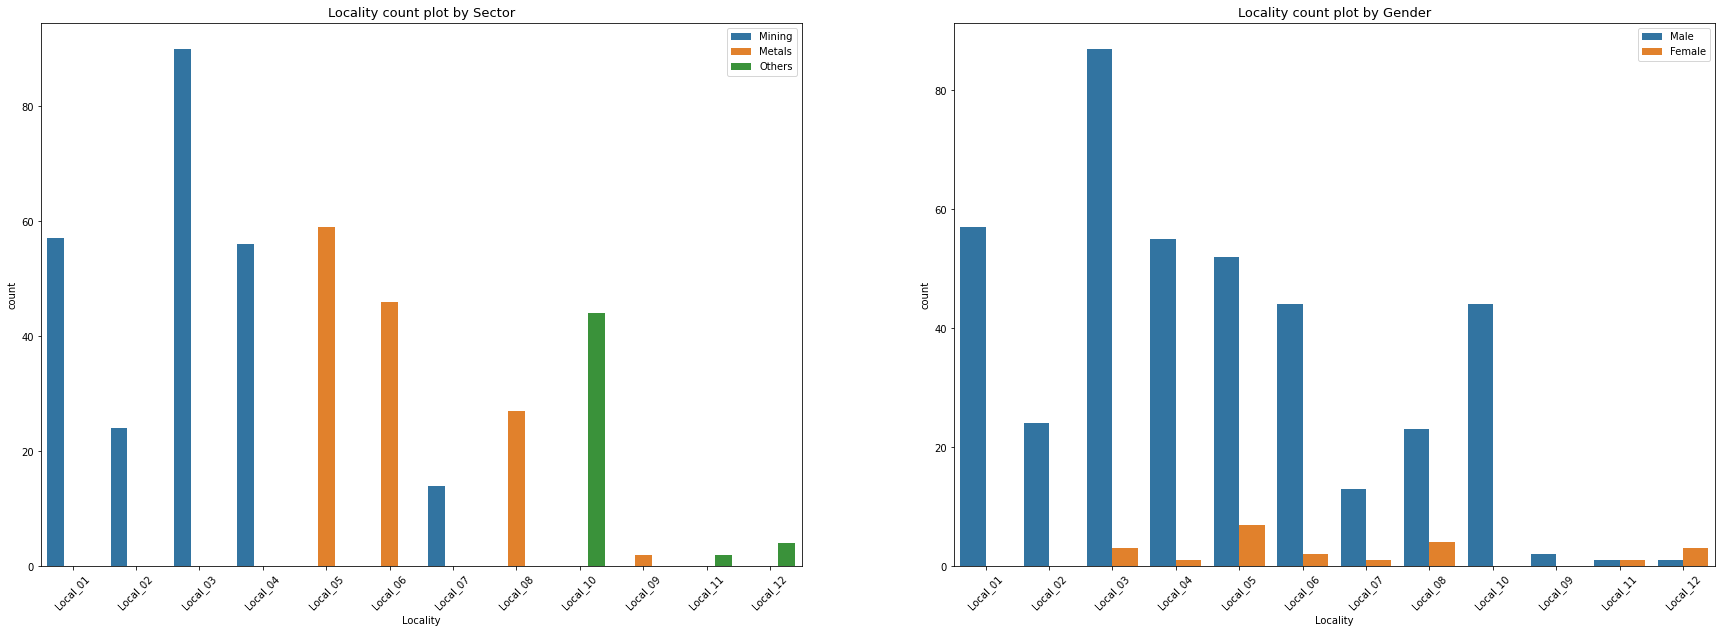

----------------------------------------------------------------------------
ANALYSIS BY Emp_type on Sector / Gender:


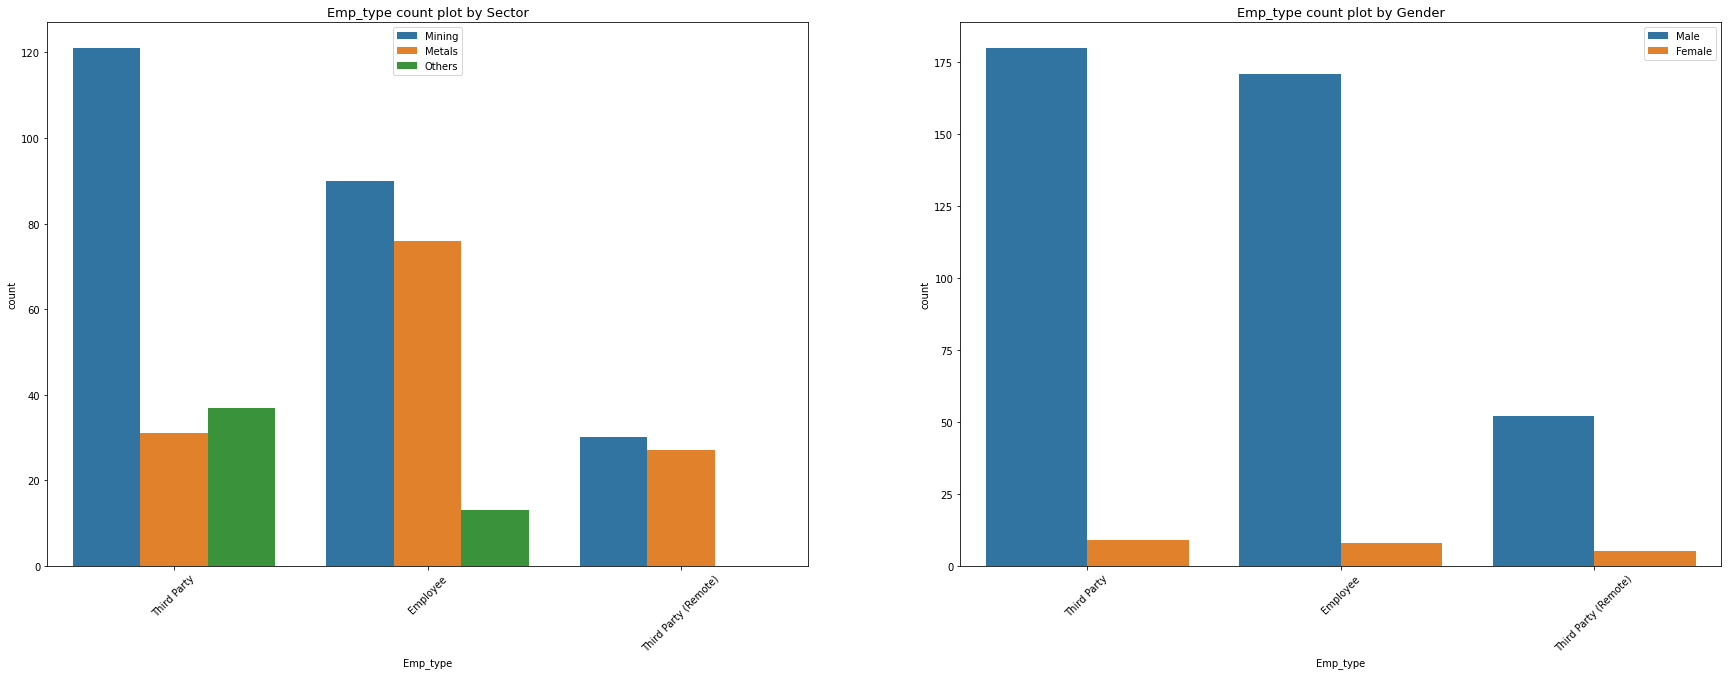

----------------------------------------------------------------------------
ANALYSIS BY Acc_level on Sector / Gender:


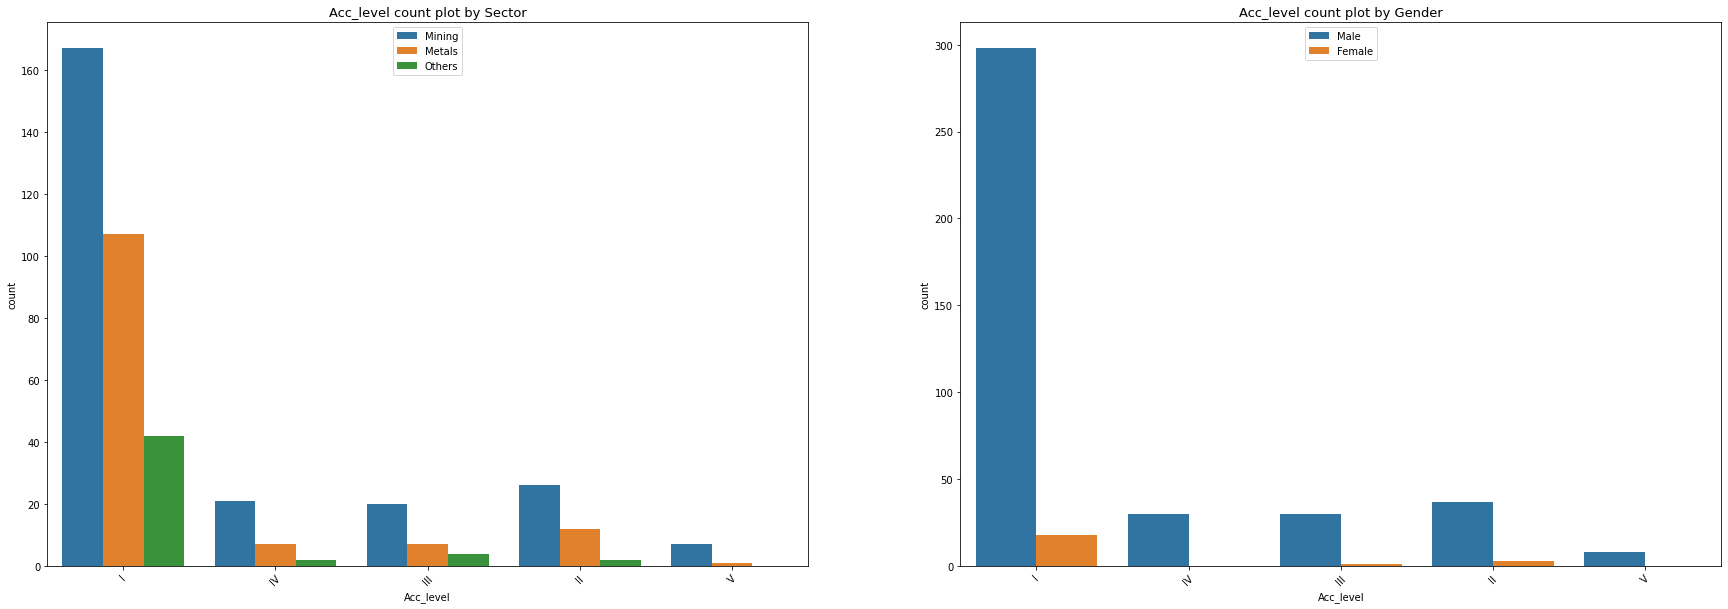

----------------------------------------------------------------------------
ANALYSIS BY Pot_Acc_Level on Sector / Gender:


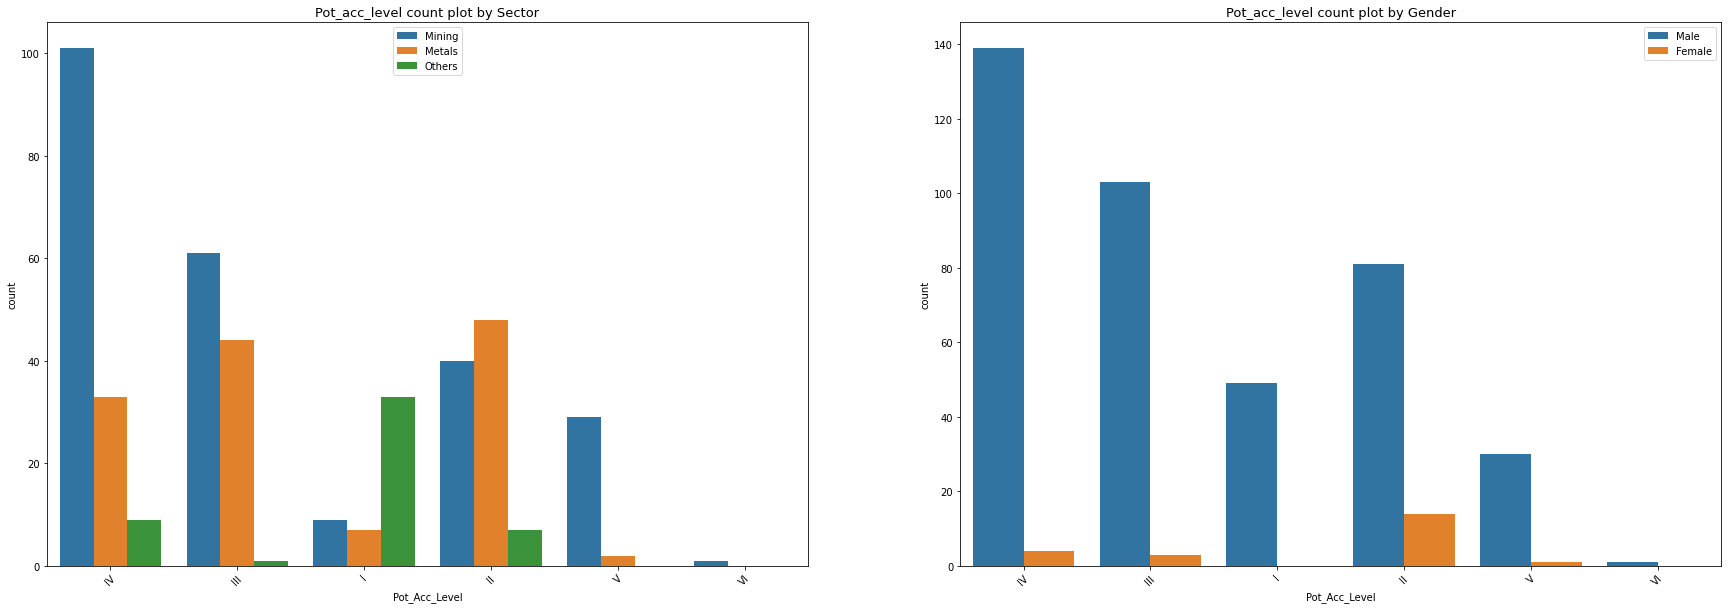

----------------------------------------------------------------------------
ANALYSIS BY Year on Sector / Gender:


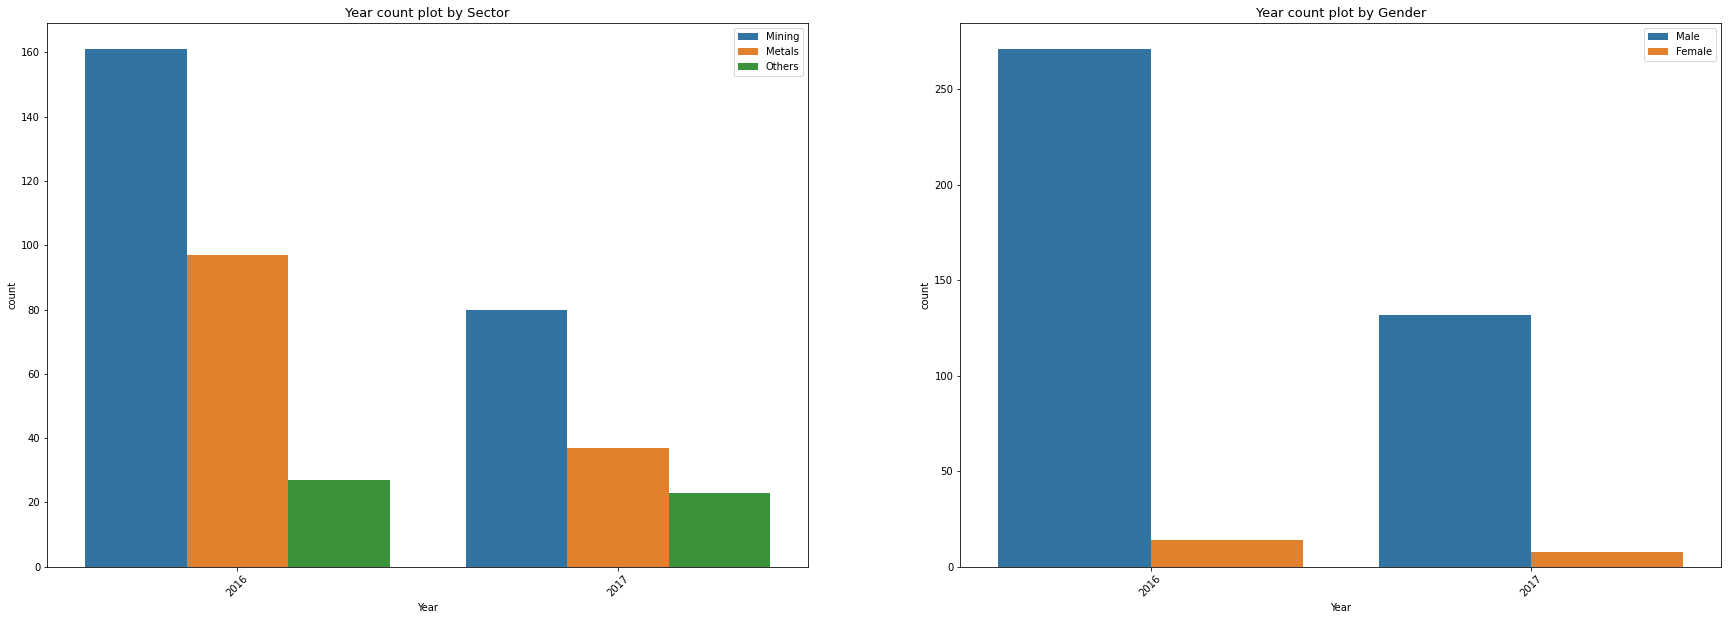

----------------------------------------------------------------------------
ANALYSIS BY Month on Sector / Gender:


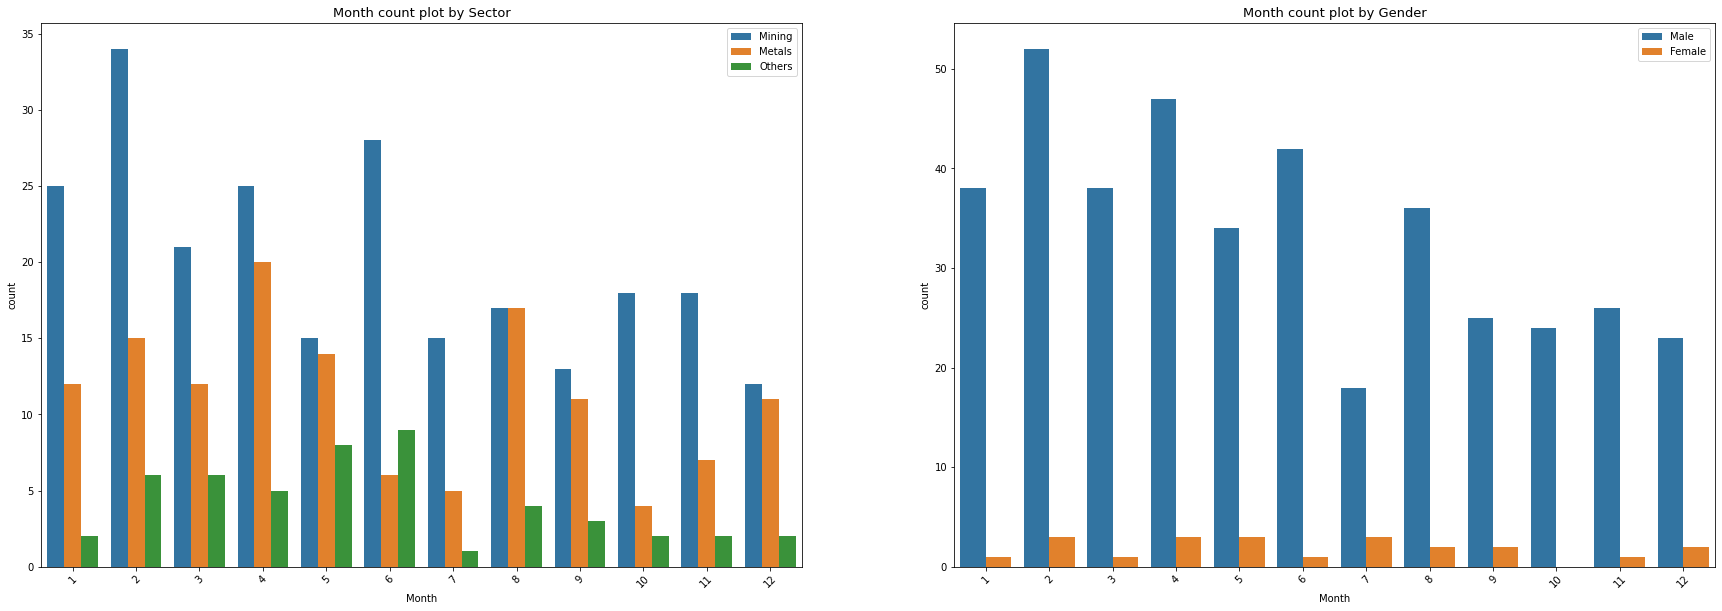

----------------------------------------------------------------------------
ANALYSIS BY Day on Sector / Gender:


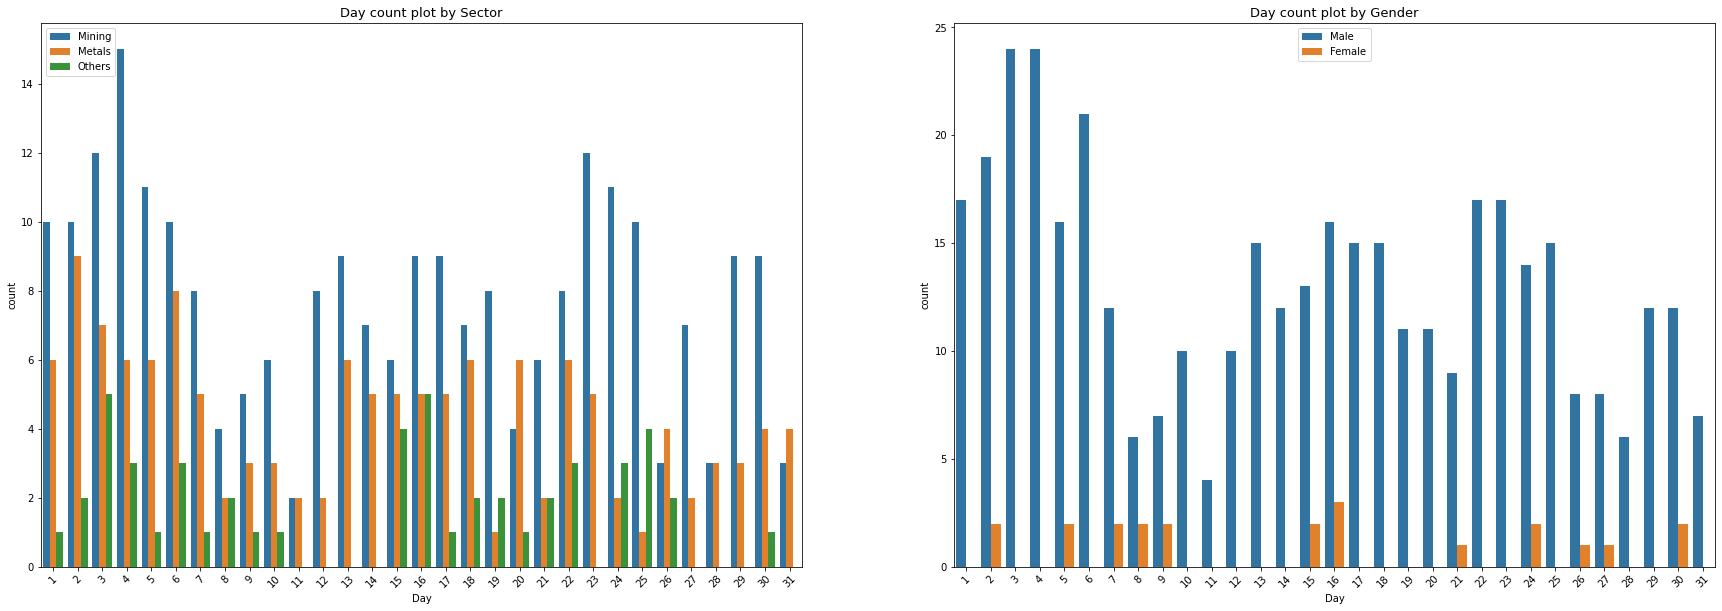

----------------------------------------------------------------------------
ANALYSIS BY Weekday on Sector / Gender:


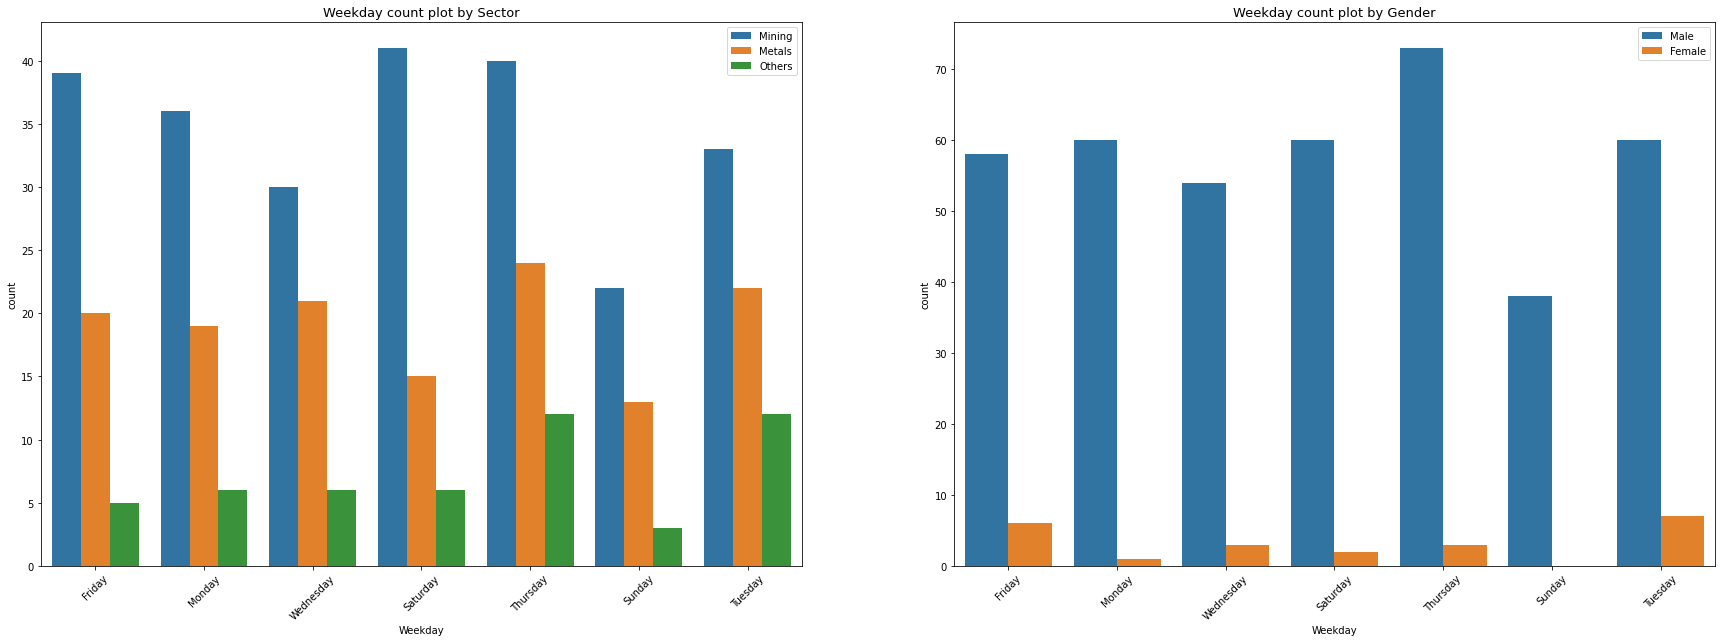

----------------------------------------------------------------------------
ANALYSIS BY Season on Sector / Gender:


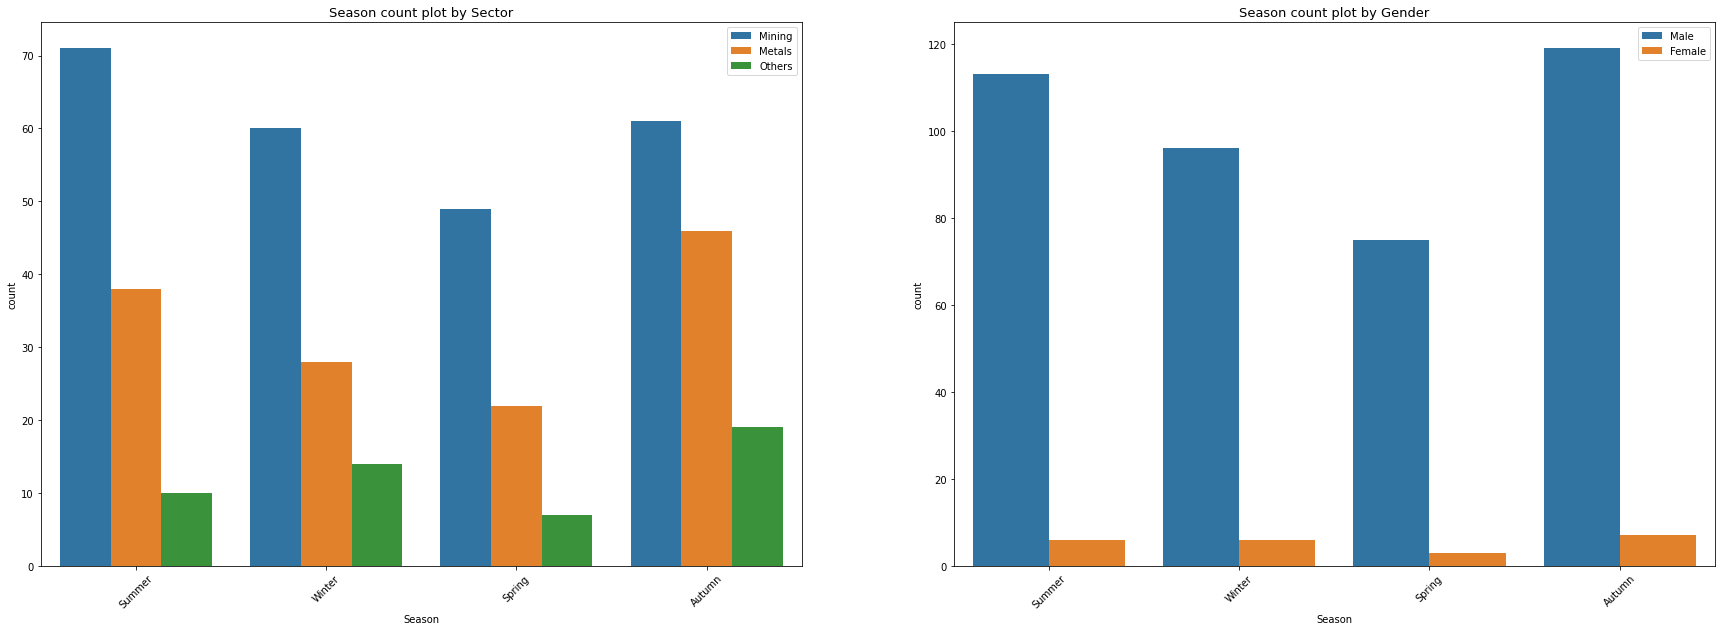

----------------------------------------------------------------------------
ANALYSIS BY Quarter on Sector / Gender:


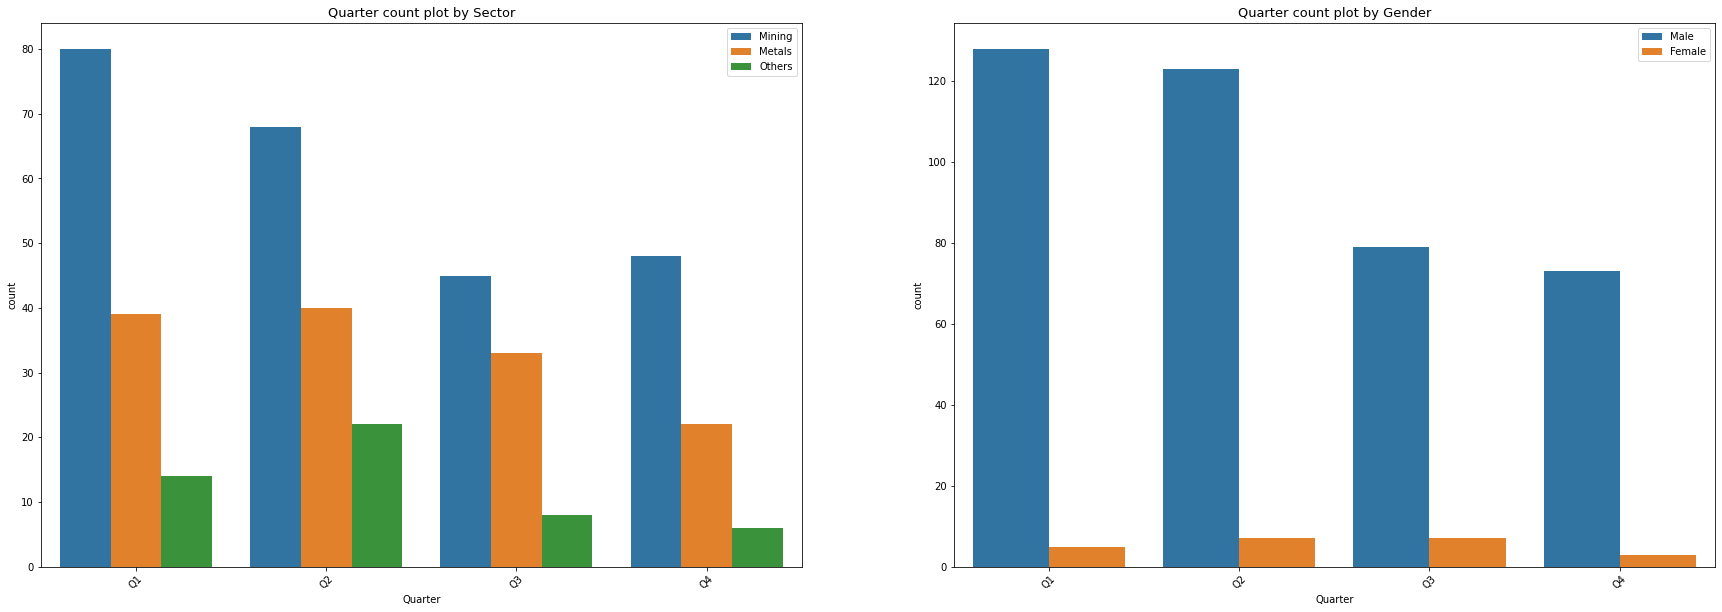

----------------------------------------------------------------------------


In [28]:
for column in ['Country', 'Locality', 'Emp_type', 'Acc_level', 'Pot_Acc_Level','Year', 'Month', 'Day', 'Weekday', 'Season', 'Quarter']:
    print('ANALYSIS BY ' + column + ' on Sector / Gender:')
    MulvarPlot(column)
    print('----------------------------------------------------------------------------')

### **Multivariate Analysis Summary**

## **Label Encoding & Onehot Encoding**

In [29]:
df_le=df

In [30]:
df_le.columns

Index(['Date', 'Country', 'Locality', 'Sector', 'Acc_level', 'Pot_Acc_Level',
       'Gender', 'Emp_type', 'Risk_Type', 'Description', 'Year', 'Month',
       'Day', 'Weekday', 'WeekofYear', 'Season', 'Quarter'],
      dtype='object')

In [31]:
label_encoder = LabelEncoder()
for column in ['Country', 'Locality', 'Sector', 'Acc_level', 'Pot_Acc_Level', 'Gender', 'Emp_type', 'Risk_Type','Year', 'Month', 'Day', 'Weekday', 'WeekofYear','Season', 'Quarter']:
  df_le[column]= label_encoder.fit_transform(df_le[column]) 

df_le.head()


Date  Country  Locality  Sector  ...  Weekday  WeekofYear  Season  Quarter
0 2016-01-01        0         0       1  ...        0          52       2        0
1 2016-02-01        1         1       1  ...        1           4       2        0
2 2016-06-01        0         2       1  ...        6          21       3        1
3 2016-08-01        0         3       1  ...        1          30       3        2
4 2016-10-01        0         3       1  ...        2          38       1        3

[5 rows x 17 columns]

In [32]:
change_values = {"Country": {0:1,1:2,2:3}, "Locality": {0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10,10:11,11:12},"Sector": {0:1,1:2,2:3},"Acc_level":{0:1,1:2,2:3,3:4,4:5},"Pot_Acc_Level":{0:1,1:2,2:3,3:4,4:5,5:6},"Emp_type":{0:1,1:2,2:3},"Year":{0:1,1:2},
                 "Month": {0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10,10:11,11:12}, "Day": {0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10,10:11,11:12,12:13,13:14,14:15,15:16,16:17,17:18,18:19,19:20,20:21,21:22,22:23,23:24,24:25,25:26,26:27,27:28,28:29,29:30,30:31}, "Weekday":{0:1,1:2,2:3,3:4,4:5,5:6,6:7},
                 "Season":{0:1,1:2,2:3,3:4},"Quarter":{0:1,1:2,2:3,3:4}}

In [33]:
df_le =df_le.replace(change_values)
df_le.head()

Date  Country  Locality  Sector  ...  Weekday  WeekofYear  Season  Quarter
0 2016-01-01        1         1       2  ...        1          52       3        1
1 2016-02-01        2         2       2  ...        2           4       3        1
2 2016-06-01        1         3       2  ...        7          21       4        2
3 2016-08-01        1         4       2  ...        2          30       4        3
4 2016-10-01        1         4       2  ...        3          38       2        4

[5 rows x 17 columns]

## **Pair Plotting**

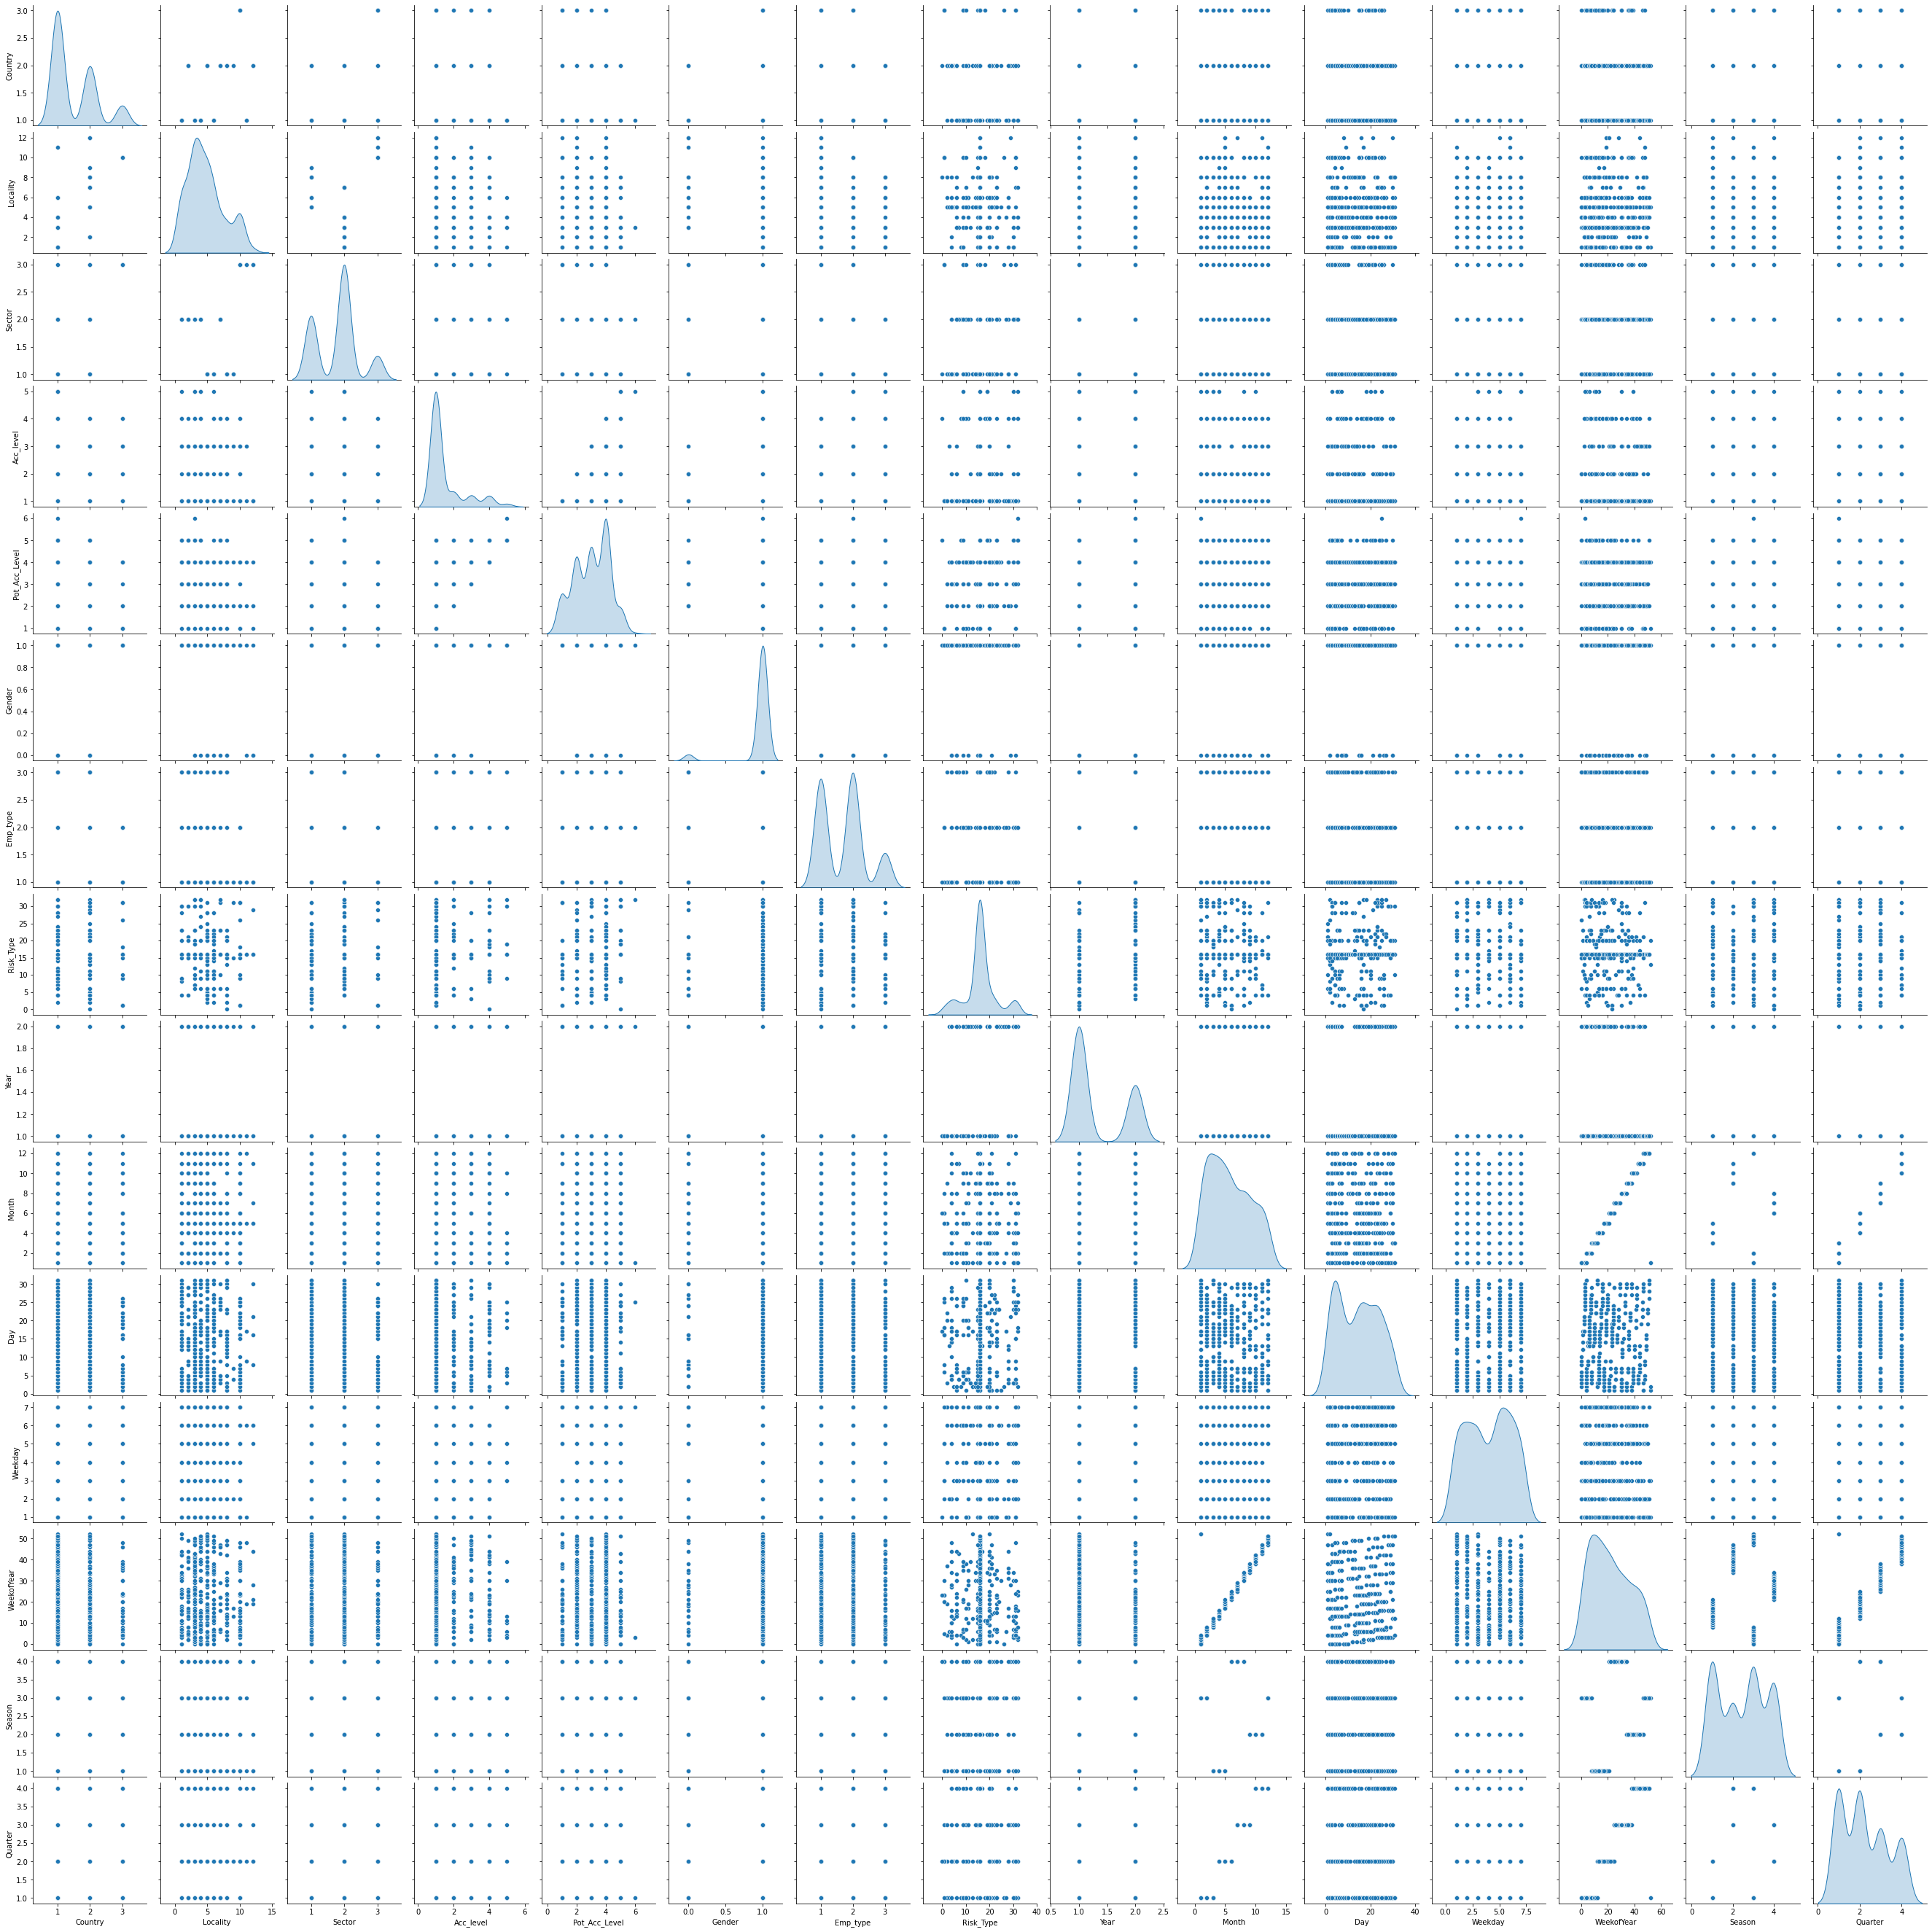

In [34]:
df_le1 = df_le.drop(columns = ['Date', 'Description'])

sns.pairplot(df_le1, diag_kind='kde');

## **NLP Preprocessing**

### **Removing all irrelevant Characters**

In [36]:
def rem_nonAlphaNumeric(Description):
  return re.sub('[^a-zA-Z0-9]',' ',Description)

df_le['CleanDescription'] = df_le['Description'].apply(rem_nonAlphaNumeric)
df_le.head()

Date  ...                                   CleanDescription
0 2016-01-01  ...  While removing the drill rod of the Jumbo 08 f...
1 2016-02-01  ...  During the activation of a sodium sulphide pum...
2 2016-06-01  ...  In the sub station MILPO located at level  170...
3 2016-08-01  ...  Being 9 45 am  approximately in the Nv  1880 C...
4 2016-10-01  ...  Approximately at 11 45 a m  in circumstances t...

[5 rows x 18 columns]

### **Remove Numerical values**

In [37]:
def rem_Numeric(Description):
  return re.sub('[^a-zA-Z]',' ',Description)

df_le['CleanDescription'] = df_le['CleanDescription'].apply(rem_Numeric)
df_le.head()

Date  ...                                   CleanDescription
0 2016-01-01  ...  While removing the drill rod of the Jumbo    f...
1 2016-02-01  ...  During the activation of a sodium sulphide pum...
2 2016-06-01  ...  In the sub station MILPO located at level     ...
3 2016-08-01  ...  Being      am  approximately in the Nv       C...
4 2016-10-01  ...  Approximately at       a m  in circumstances t...

[5 rows x 18 columns]

### **Change all Characters to lowercase**

In [38]:
def to_lcase(Description):
  return str(Description).lower()

df_le['CleanDescription'] = df_le['CleanDescription'].apply(to_lcase)
df_le.head()

Date  ...                                   CleanDescription
0 2016-01-01  ...  while removing the drill rod of the jumbo    f...
1 2016-02-01  ...  during the activation of a sodium sulphide pum...
2 2016-06-01  ...  in the sub station milpo located at level     ...
3 2016-08-01  ...  being      am  approximately in the nv       c...
4 2016-10-01  ...  approximately at       a m  in circumstances t...

[5 rows x 18 columns]

### **Word Tokenizing**

In [39]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

def to_wordtokenize(Description):
  return word_tokenize(Description)

df_le['CleanDescription'] = df_le['CleanDescription'].apply(to_wordtokenize)
df_le.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Date  ...                                   CleanDescription
0 2016-01-01  ...  [while, removing, the, drill, rod, of, the, ju...
1 2016-02-01  ...  [during, the, activation, of, a, sodium, sulph...
2 2016-06-01  ...  [in, the, sub, station, milpo, located, at, le...
3 2016-08-01  ...  [being, am, approximately, in, the, nv, cx, ob...
4 2016-10-01  ...  [approximately, at, a, m, in, circumstances, t...

[5 rows x 18 columns]

### **Remove Stopwords**

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):  
  return [item for item in text if item not in stop_words]

df_le['CleanDescription'] = df_le['CleanDescription'].apply(remove_stopwords)
df_le.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Date  ...                                   CleanDescription
0 2016-01-01  ...  [removing, drill, rod, jumbo, maintenance, sup...
1 2016-02-01  ...  [activation, sodium, sulphide, pump, piping, u...
2 2016-06-01  ...  [sub, station, milpo, located, level, collabor...
3 2016-08-01  ...  [approximately, nv, cx, ob, personnel, begins,...
4 2016-10-01  ...  [approximately, circumstances, mechanics, anth...

[5 rows x 18 columns]

### **Lemmentizing**

In [41]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

Word_lemmat = WordNetLemmatizer()
def lemmentize(text):  
  return [Word_lemmat.lemmatize(word=w, pos='v') for w in text]

df_le['CleanDescription'] = df_le['CleanDescription'].apply(lemmentize)
df_le.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Date  ...                                   CleanDescription
0 2016-01-01  ...  [remove, drill, rod, jumbo, maintenance, super...
1 2016-02-01  ...  [activation, sodium, sulphide, pump, pip, unco...
2 2016-06-01  ...  [sub, station, milpo, locate, level, collabora...
3 2016-08-01  ...  [approximately, nv, cx, ob, personnel, begin, ...
4 2016-10-01  ...  [approximately, circumstances, mechanics, anth...

[5 rows x 18 columns]

### **Remove the words having length less than and equal to 2**

In [42]:
def rem_2lenword(text):
  return [i for i in text if len(i)>2]

df_le['CleanDescription'] = df_le['CleanDescription'].apply(rem_2lenword)
df_le.head()

Date  ...                                   CleanDescription
0 2016-01-01  ...  [remove, drill, rod, jumbo, maintenance, super...
1 2016-02-01  ...  [activation, sodium, sulphide, pump, pip, unco...
2 2016-06-01  ...  [sub, station, milpo, locate, level, collabora...
3 2016-08-01  ...  [approximately, personnel, begin, task, unlock...
4 2016-10-01  ...  [approximately, circumstances, mechanics, anth...

[5 rows x 18 columns]

### **Convert to string back**

In [43]:
def conv2str(ListDesc):
  return ' '.join(ListDesc)

df_le['New_Description'] = df_le['CleanDescription'].apply(conv2str)
df_le.head()

Date  ...                                    New_Description
0 2016-01-01  ...  remove drill rod jumbo maintenance supervisor ...
1 2016-02-01  ...  activation sodium sulphide pump pip uncouple s...
2 2016-06-01  ...  sub station milpo locate level collaborator ex...
3 2016-08-01  ...  approximately personnel begin task unlock soqu...
4 2016-10-01  ...  approximately circumstances mechanics anthony ...

[5 rows x 19 columns]

In [44]:
df_le.to_csv('NLP for Feature Extraction.csv')

## **Text Visualization**

### **Split Dataset for Visualization as per Class**

In [45]:
#Descriptions grouped as per Accident Level
AL1=df_le[df_le.Acc_level==1]['New_Description']
AL2=df_le[df_le.Acc_level==2]['New_Description']
AL3=df_le[df_le.Acc_level==3]['New_Description']
AL4=df_le[df_le.Acc_level==4]['New_Description']
AL5=df_le[df_le.Acc_level==5]['New_Description']


In [46]:
#Descriptions grouped as per Potential Accident Level
PAL1=df_le[df_le.Pot_Acc_Level==1]['New_Description']
PAL2=df_le[df_le.Pot_Acc_Level==2]['New_Description']
PAL3=df_le[df_le.Pot_Acc_Level==3]['New_Description']
PAL4=df_le[df_le.Pot_Acc_Level==4]['New_Description']
PAL5=df_le[df_le.Pot_Acc_Level==5]['New_Description']
PAL6=df_le[df_le.Pot_Acc_Level==6]['New_Description']


For Accident Levels


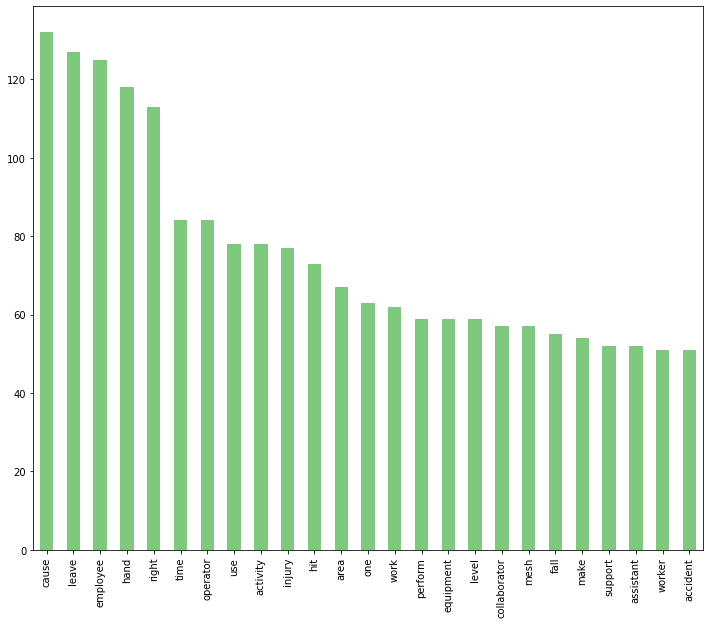

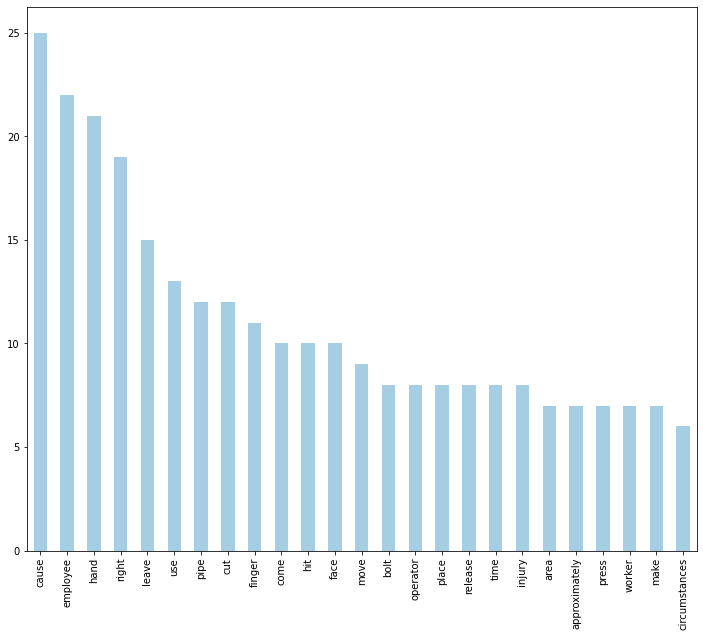

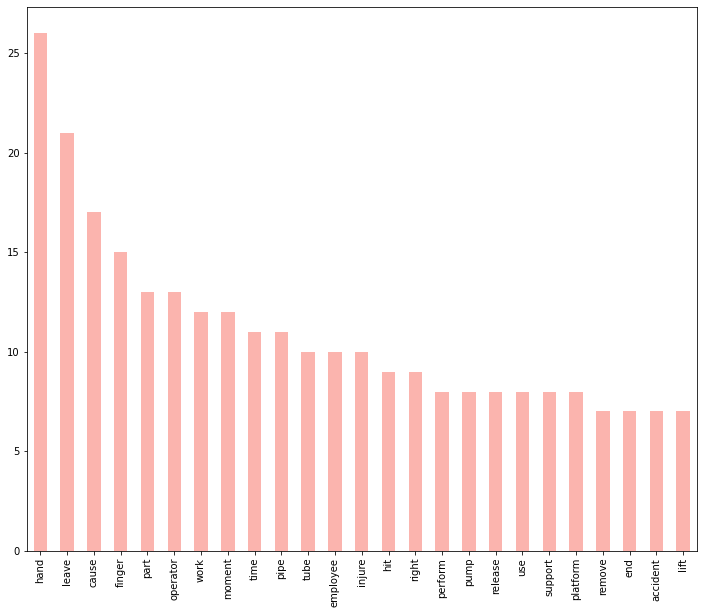

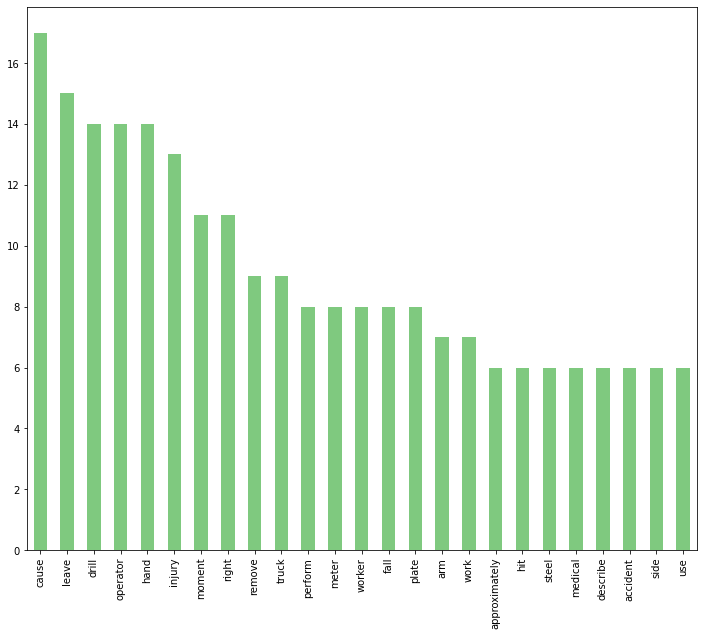

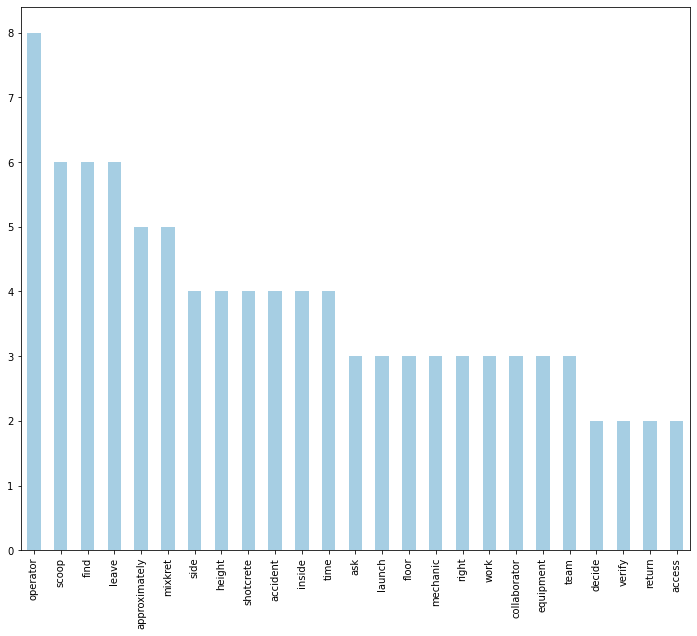


For Potential Accident Levels


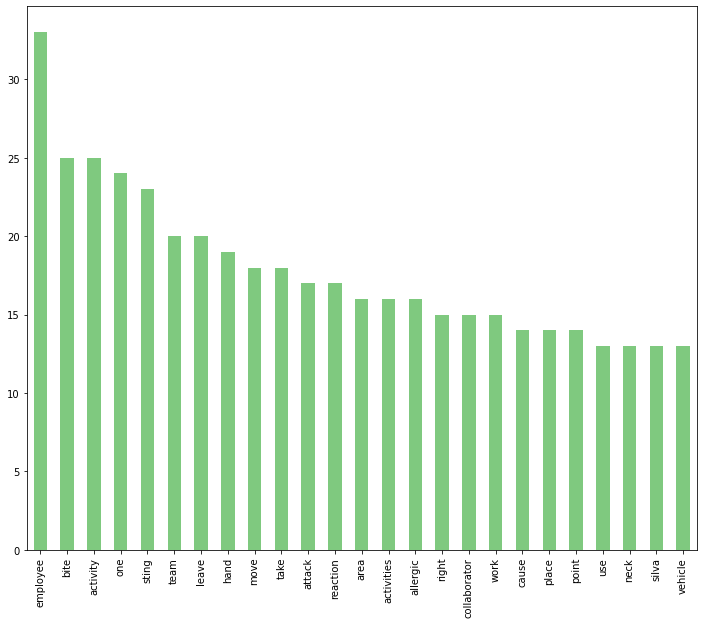

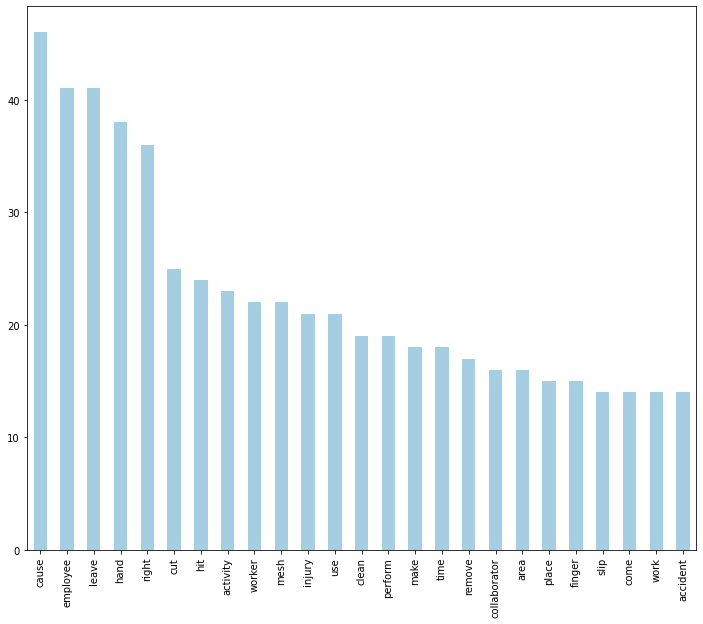

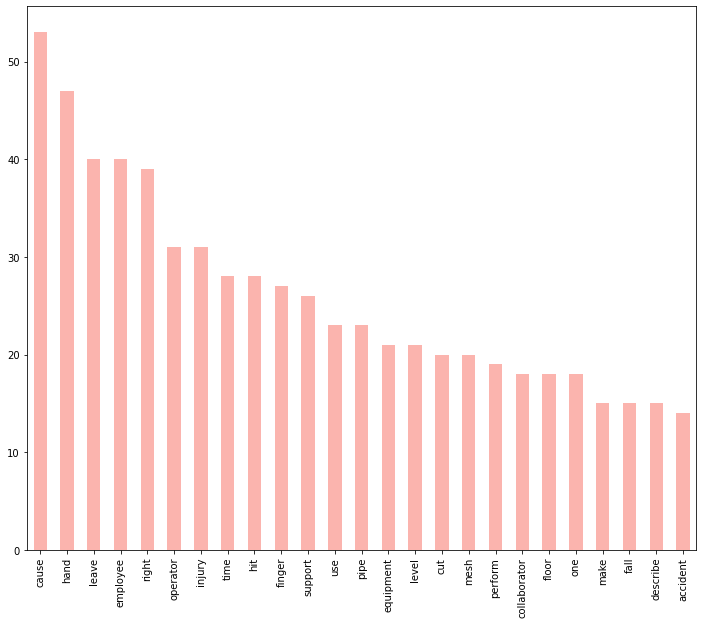

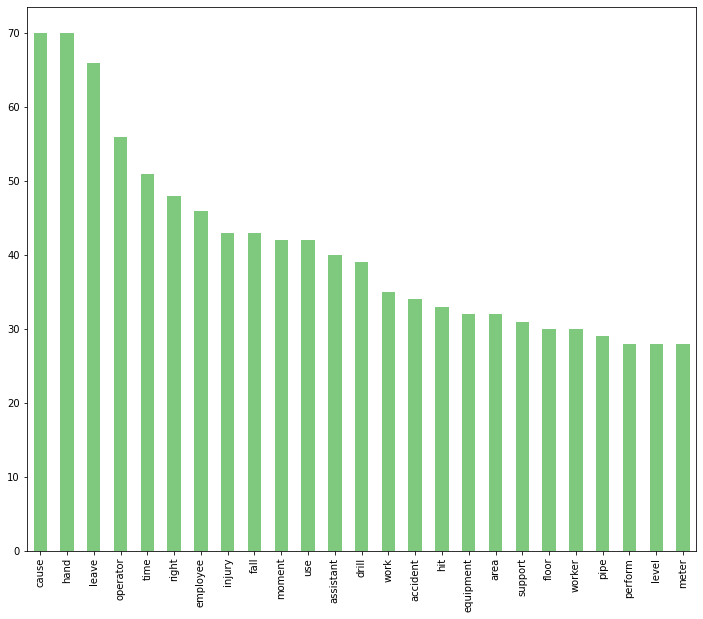

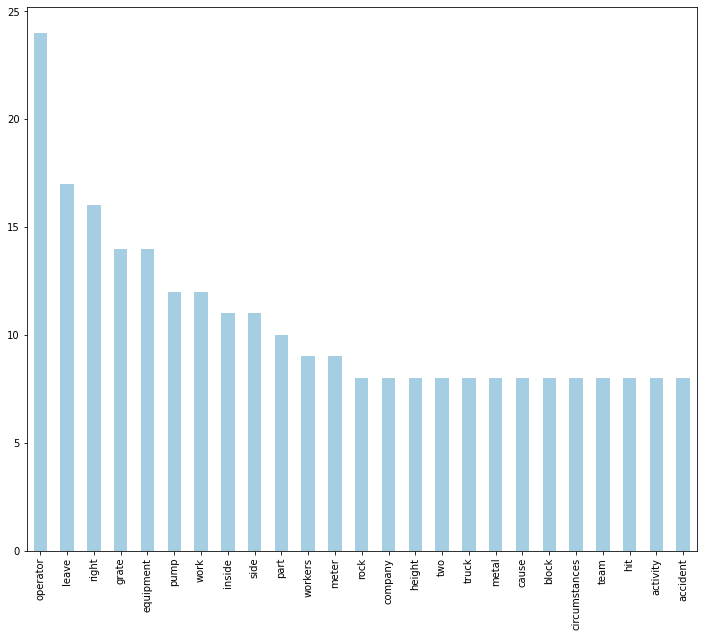

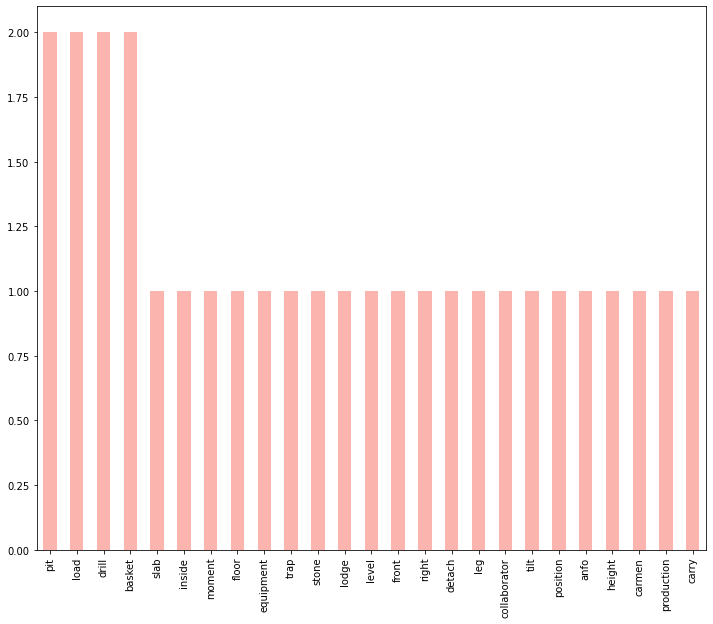

In [47]:
color = ['Accent','Paired','Pastel1','Accent','Paired','Pastel1']
data_group_AL = [AL1,AL2,AL3,AL4,AL5]
data_group_PAL = [PAL1,PAL2,PAL3,PAL4,PAL5,PAL6]
print ('For Accident Levels')
for item in range(5):
  plt.figure(figsize=(12,10))
  pd.Series(' '.join([i for i in data_group_AL[item]]).split()).value_counts().head(25).plot(kind='bar', colormap=color[item])
  plt.show()

print ('\nFor Potential Accident Levels')
for item in range(6):
  plt.figure(figsize=(12,10))
  pd.Series(' '.join([i for i in data_group_PAL[item]]).split()).value_counts().head(25).plot(kind='bar', colormap=color[item])
  plt.show()


In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_le.New_Description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## **N-grams**

## **Word Embedding**